# Rainfall Weather Forecasting


Project Description

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change. Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia.
Here, predict two things:
    
Problem Statement: 
    
Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

Dataset Description:
    
Number of columns: 23
    
Date - The date of observation

Location -The common name of the location of the weather station

MinTemp -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall -The amount of rainfall recorded for the day in mm

Evaporation -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
    
RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

In [158]:
#Importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
%matplotlib inline
warnings.filterwarnings('ignore')


In [159]:
df= pd.read_csv("Rainfall Weather Forecasting.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No



In the above dataset we have 23 columns and 8425 rows.

In [160]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No



It describe the first 5 columns of the dataset 

In [161]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


It describe the last 5 columns of the dataset

In [162]:
df.shape

(8425, 23)

It helps in checking the shape of dataset as it contains 8425 row and 23 columns

In [163]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

It helps in checking the columns of the dataset, as it contains the columns name of the datast including the target column

In [164]:
df.columns.tolist()

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

Converting the columns into the list format 

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

This method shows the good overview of the dataset. The dataset contains 8425 rows and 23 columns. In the dataset there are some null values present. The dataset consist of object and float datatype The total memory usage of the dataset is 1.5+ MB

In [166]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

The above dataset contains the float and oject datatype columns. The dtype of the dataset is object

In [167]:
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

This method shows the number of unique values in each column of the dataset The highest number of unique value present in the date column

In [168]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64


In the above dataset there are many missing values present

<AxesSubplot:>

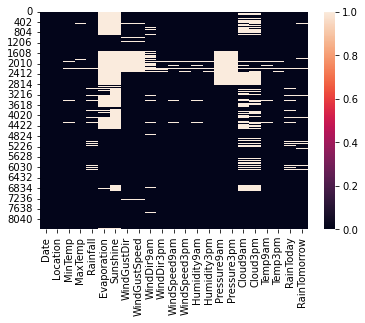

In [169]:
sns.heatmap(df.isnull())

The above heatmap clearly shows the missing values present in each columns.

In [170]:
for i in df.columns:
        print(df[i].value_counts())
        print("\n")

2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64


Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64


 12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: MinTemp, Length: 285, dtype: int64


19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64


0.0      5299
0.2       406
0.4       177
0.6       116
1.2        86
         ... 
61.2        1
128.0       1
90.0        1
34.4        1
40.0        1
Name: R


In the above column checking the value counts of each columns 

In [171]:
category_column=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        category_column.append(i)
print(category_column)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In the above dataset these are the categorical columns present.

In [172]:
numerical_column=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_column.append(i)
print(numerical_column)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']



In the above dataset these are the numerical columns present.

In [173]:
import datetime as dt
df["Date"]=pd.to_datetime(df["Date"])
df["Year"]=df["Date"].dt.year
df["Month"]=df["Date"].dt.month
df["Day"]=df["Date"].dt.day

Inserting the year,month and day column in the dataset 

In [174]:
df.drop(["Date"],axis=1,inplace=True)

dropping the irrelevant column

In [175]:
df["Day"].value_counts()

21    280
20    280
25    280
24    280
23    280
22    280
10    278
12    278
11    278
9     277
8     277
7     277
13    277
18    277
19    277
14    276
15    276
6     276
17    276
16    276
28    275
1     275
2     275
5     275
4     275
3     275
26    274
27    274
29    256
30    250
31    165
Name: Day, dtype: int64

In the above data the number of value counts present in day column.

In [176]:
df["Month"].value_counts()

6     818
5     801
3     761
1     753
12    741
7     732
8     682
10    655
11    653
2     620
9     609
4     600
Name: Month, dtype: int64

In the above data the number of value counts present in month column.

In [177]:
df["Year"].value_counts()

2011    1468
2010    1443
2009    1238
2014     959
2012     905
2016     732
2015     653
2013     543
2017     391
2008      93
Name: Year, dtype: int64

In the above data the number of value counts present in year column.

In [178]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,1020.3,NaN,NaN,10.1,22.4,No,No,2017,6,21
8421,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,1019.1,NaN,NaN,10.9,24.5,No,No,2017,6,22
8422,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,1016.8,NaN,NaN,12.5,26.1,No,No,2017,6,23
8423,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,1016.5,3.0,2.0,15.1,26.0,No,No,2017,6,24


In [179]:
df.loc[df['Day']==" "]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day


In the above dataset there is no spaces present

In [180]:
df.skew()

MinTemp          -0.089588
MaxTemp           0.379297
Rainfall         13.028837
Evaporation      10.710605
Sunshine         -0.519717
WindGustSpeed     0.711103
WindSpeed9am      0.956250
WindSpeed3pm      0.491069
Humidity9am      -0.255843
Humidity3pm       0.117563
Pressure9am      -0.022133
Pressure3pm      -0.009385
Cloud9am         -0.309417
Cloud3pm         -0.232598
Temp9am          -0.014699
Temp3pm           0.395061
Year              0.418663
Month             0.039388
Day               0.004260
dtype: float64

In the above dataset we have skewness present in Rainfall, Evaporation,WindGustSpeed and WindSpeed9am.


In [181]:
df[numerical_column].isnull().sum()

MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustSpeed     991
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
dtype: int64

It hepls in checking the null values present in numerical columns.

In the above data the highest number of null values is present in Sunshine column.



In [182]:
df["MinTemp"] = df["MinTemp"].fillna(df["MinTemp"].mean())
df["MaxTemp"] = df["MaxTemp"].fillna(df["MaxTemp"].mean())
df["Sunshine"] = df["Sunshine"].fillna(df["Sunshine"].mean())
df["WindSpeed3pm"] = df["WindSpeed3pm"].fillna(df["WindSpeed3pm"].mean())
df["Humidity9am"] = df["Humidity9am"].fillna(df["Humidity9am"].mean())
df["Humidity3pm"] = df["Humidity3pm"].fillna(df["Humidity3pm"].mean())
df["Pressure9am"] = df["Pressure9am"].fillna(df["Pressure9am"].mean())
df["Pressure3pm"] = df["Pressure3pm"].fillna(df["Pressure3pm"].mean())
df["Cloud9am"] = df["Cloud9am"].fillna(df["Cloud9am"].mean())
df["Cloud3pm"] = df["Cloud3pm"].fillna(df["Cloud3pm"].mean())
df["Temp9am"] = df["Temp9am"].fillna(df["Temp9am"].mean())
df["Temp3pm"] = df["Temp3pm"].fillna(df["Temp3pm"].mean())

In [183]:
category_column=['Location', 'WindGustDir','WindDir9am','WindDir3pm', 'RainToday','RainTomorrow']

In [184]:
category_column

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [185]:
df[category_column].isnull().sum()

Location          0
WindGustDir     991
WindDir9am      829
WindDir3pm      308
RainToday       240
RainTomorrow    239
dtype: int64

In the above category columns number of null values is present accept the location column

In [186]:
df["WindGustDir"] = df["WindGustDir"].fillna(df["WindGustDir"].mode()[0])
df["WindDir9am"] = df["WindDir9am"].fillna(df["WindDir9am"].mode()[0])
df["WindDir3pm"] = df["WindDir3pm"].fillna(df["WindDir3pm"].mode()[0])
df["RainToday"] = df["RainToday"].fillna(df["RainToday"].mode()[0])
df["RainTomorrow"] = df["RainTomorrow"].fillna(df["RainTomorrow"].mode()[0])

Replacing null values in categorical column with mode()

In [187]:
df[category_column].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [188]:
df.isnull().sum()

Location            0
MinTemp             0
MaxTemp             0
Rainfall          240
Evaporation      3512
Sunshine            0
WindGustDir         0
WindGustSpeed     991
WindDir9am          0
WindDir3pm          0
WindSpeed9am       76
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
Year                0
Month               0
Day                 0
dtype: int64

In [189]:
df["Rainfall"] = df["Rainfall"].fillna(df["Rainfall"].mode()[0])
df["Evaporation"] = df["Evaporation"].fillna(df["Evaporation"].mode()[0])
df["WindGustSpeed"] = df["WindGustSpeed"].fillna(df["WindGustSpeed"].mode()[0])
df["WindSpeed9am"] = df["WindSpeed9am"].fillna(df["WindSpeed9am"].mode()[0])


In [190]:
df[numerical_column].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [191]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

In the above dataset we have remove the null values from category and numerical columns

In [192]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.900000,0.6,4.0,7.632205,W,44.0,W,WNW,...,1007.1,8.000000,4.503183,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.100000,0.0,4.0,7.632205,WNW,44.0,NNW,WSW,...,1007.8,4.566622,4.503183,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.700000,0.0,4.0,7.632205,WSW,46.0,W,WSW,...,1008.7,4.566622,2.000000,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.000000,0.0,4.0,7.632205,NE,24.0,SE,E,...,1012.8,4.566622,4.503183,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.300000,1.0,4.0,7.632205,W,41.0,ENE,NW,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.400000,0.0,4.0,7.632205,E,31.0,SE,ENE,...,1020.3,4.566622,4.503183,10.1,22.4,No,No,2017,6,21
8421,Uluru,3.6,25.300000,0.0,4.0,7.632205,NNW,22.0,SE,N,...,1019.1,4.566622,4.503183,10.9,24.5,No,No,2017,6,22
8422,Uluru,5.4,26.900000,0.0,4.0,7.632205,N,37.0,SE,WNW,...,1016.8,4.566622,4.503183,12.5,26.1,No,No,2017,6,23
8423,Uluru,7.8,27.000000,0.0,4.0,7.632205,SE,28.0,SSE,N,...,1016.5,3.000000,2.000000,15.1,26.0,No,No,2017,6,24


In [193]:
df['RainTomorrow'].value_counts()

No     6434
Yes    1991
Name: RainTomorrow, dtype: int64

In [194]:
df['Rainfall'].value_counts()

0.0      5539
0.2       406
0.4       177
0.6       116
1.2        86
         ... 
61.2        1
128.0       1
90.0        1
34.4        1
40.0        1
Name: Rainfall, Length: 250, dtype: int64

In [195]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,13.193305,23.859976,2.725982,4.810220,7.632205,40.036320,13.803917,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,2012.102433,6.442136,15.741958
std,5.379488,6.114516,10.319872,3.912448,2.825451,13.781296,10.138945,9.704759,16.774231,18.311894,6.275759,6.217451,2.429205,2.299419,5.608301,5.945849,2.473137,3.437994,8.787354
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,2008.000000,1.000000,1.000000
25%,9.300000,19.300000,0.000000,4.000000,7.632205,31.000000,6.000000,11.000000,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000,2010.000000,3.000000,8.000000
50%,13.200000,23.300000,0.000000,4.000000,7.632205,39.000000,13.000000,19.000000,68.000000,51.000000,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.000000,2011.000000,6.000000,16.000000
75%,17.300000,28.000000,0.800000,5.200000,8.900000,48.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000,2014.000000,9.000000,23.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,2017.000000,12.000000,31.000000


It shows the statistical summary of dataset.
The counts of all the columns are same.
In the above data the mean is greater than the median(50%) in some column.
There is a huge difference between 75% and max which means the outliers are present in the columns.
In the data we observe that the minimum temp is 13.19 to min maximum temp 28.50.


<AxesSubplot:>

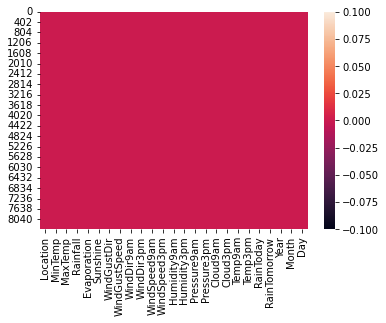

In [196]:
sns.heatmap(df.isnull())

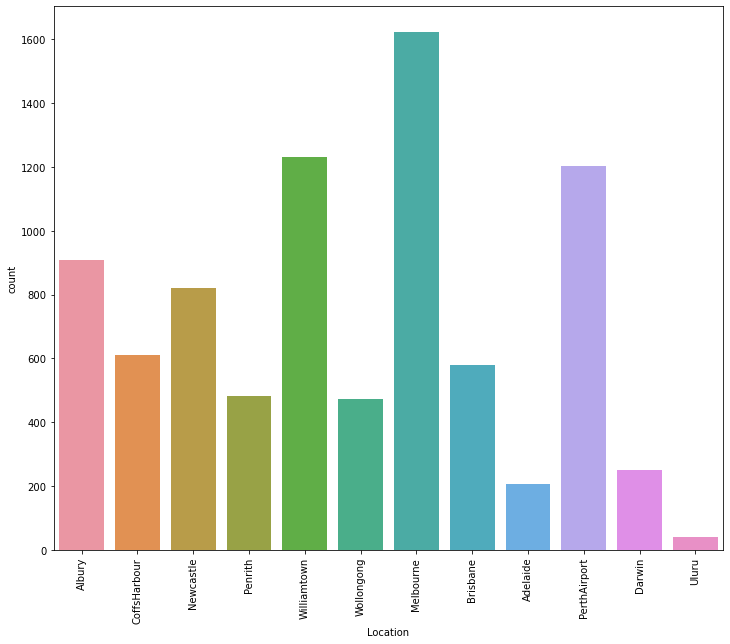

In [197]:
plt.figure(figsize=(12,10))
sns.countplot(df['Location'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='MinTemp', ylabel='Density'>

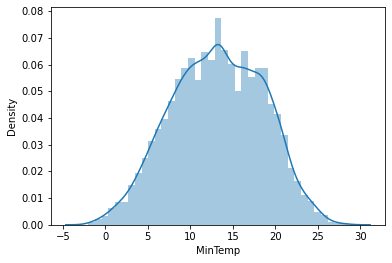

In [198]:
sns.distplot(df['MinTemp'])


<AxesSubplot:xlabel='MaxTemp', ylabel='Density'>

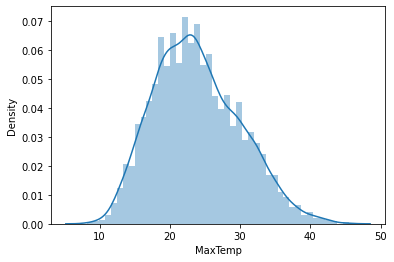

In [199]:
sns.distplot(df['MaxTemp'])

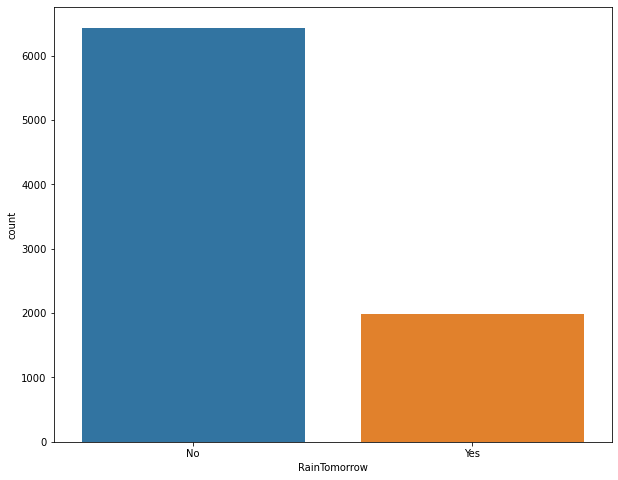

In [200]:
plt.figure(figsize=(10,8))
sns.countplot(df["RainTomorrow"])
plt.show()

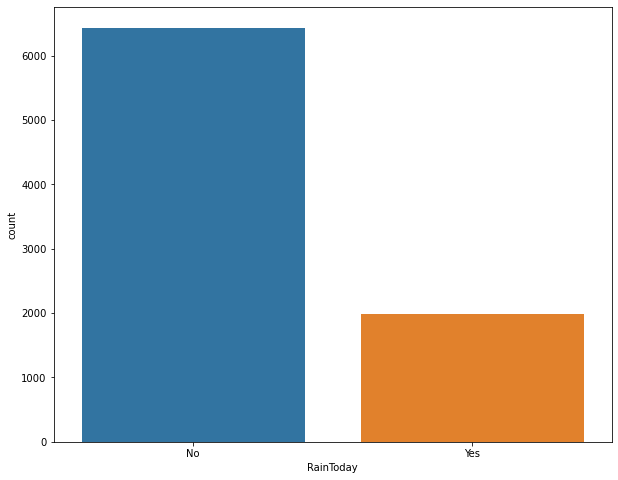

In [201]:
plt.figure(figsize=(10,8))
sns.countplot(df["RainToday"])
plt.show()

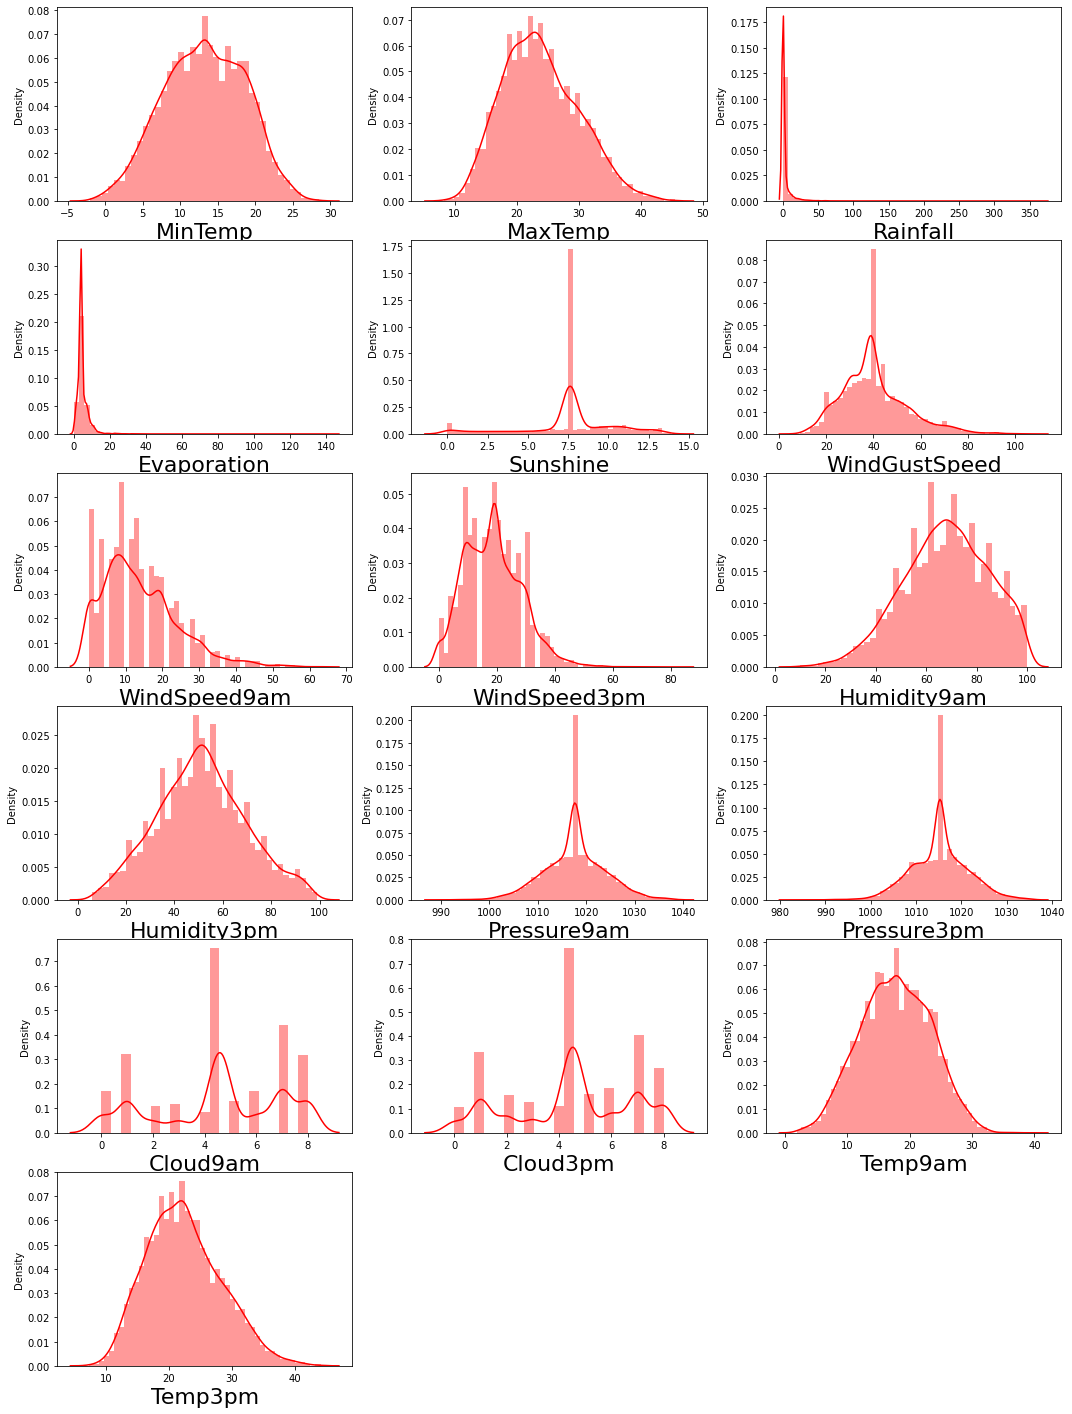

In [202]:
plt.figure(figsize=(18,25),facecolor='white')
plotnumber=1
for column in numerical_column:
    if plotnumber<=24:
        ax=plt.subplot(6,3,plotnumber)
        sns.distplot(df[column],color="red")
        plt.xlabel(column,fontsize=22)
    plotnumber+=1
plt.show()


Most of the columns are normally distributed except for Rainfall, Evaporation and Windspeed9am which are right skewed.

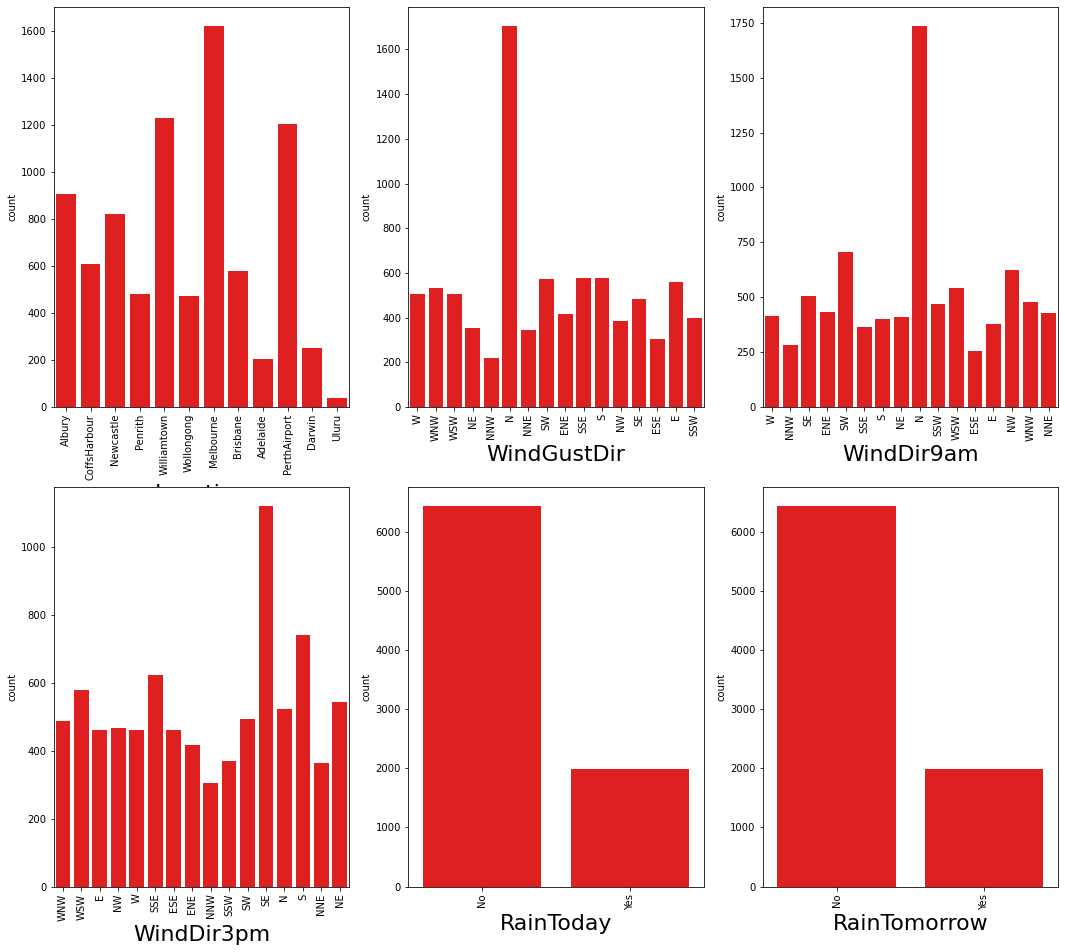

In [203]:
plt.figure(figsize=(18,25),facecolor='white')
plotnumber=1
for column in category_column:
    if plotnumber<=24:
        ax=plt.subplot(3,3,plotnumber)
        sns.countplot(df[column],color="red")
        plt.xlabel(column,fontsize=22)
        plt.xticks(rotation=90)
    plotnumber+=1
plt.show()

In the above plot location Melbourne has the most data and Uluru has the least data in my dataset.

The strongest wind direction or(Wind gust speed) in a day ranges variedly and most of the data says North.

Most of the time there is NO rain today and No Rain predicted for tomorrow.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Albury'),
  Text(1, 0, 'CoffsHarbour'),
  Text(2, 0, 'Newcastle'),
  Text(3, 0, 'Penrith'),
  Text(4, 0, 'Williamtown'),
  Text(5, 0, 'Wollongong'),
  Text(6, 0, 'Melbourne'),
  Text(7, 0, 'Brisbane'),
  Text(8, 0, 'Adelaide'),
  Text(9, 0, 'PerthAirport'),
  Text(10, 0, 'Darwin'),
  Text(11, 0, 'Uluru')])

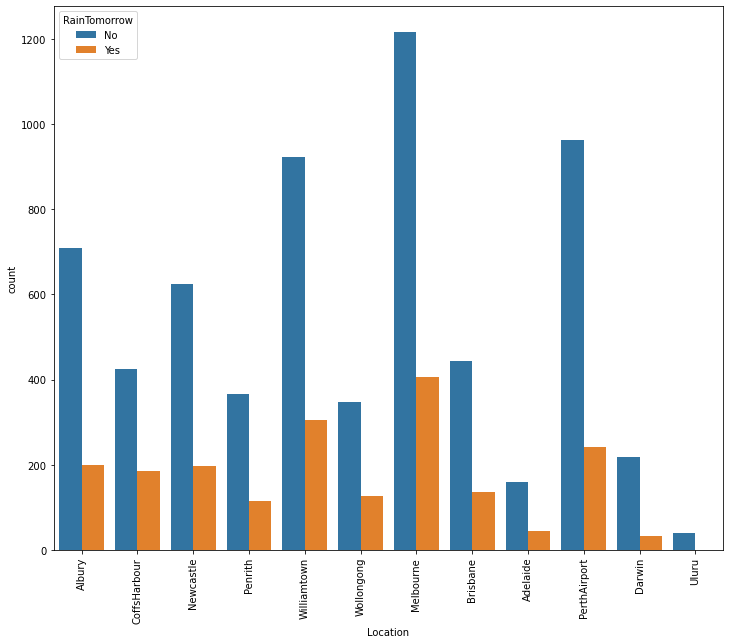

In [204]:
plt.figure(figsize=(12,10))
sns.countplot(df['Location'],hue=df['RainTomorrow'])
plt.xticks(rotation=90)

In [205]:
def stacked_plot(df, group, target):
    fig,ax= plt.subplots(figsize = (10,8))
    temp_df=(df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
    temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["red", "green"])
    ax.xaxis.set_tick_params(rotation=40)
    ax.set_xlabel(group)
    ax.set_ylabel('Forecasting')
    

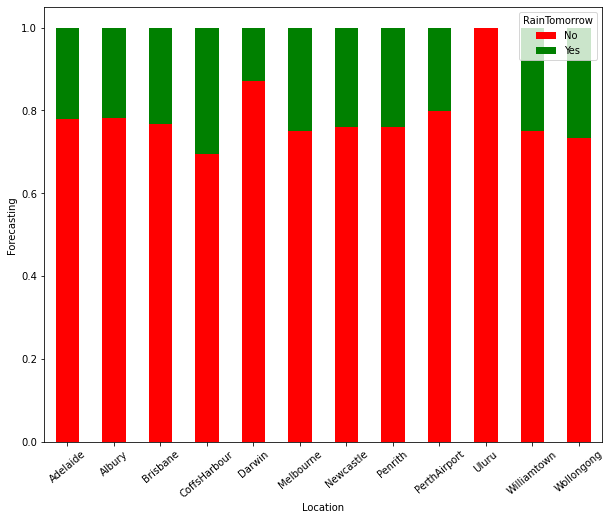

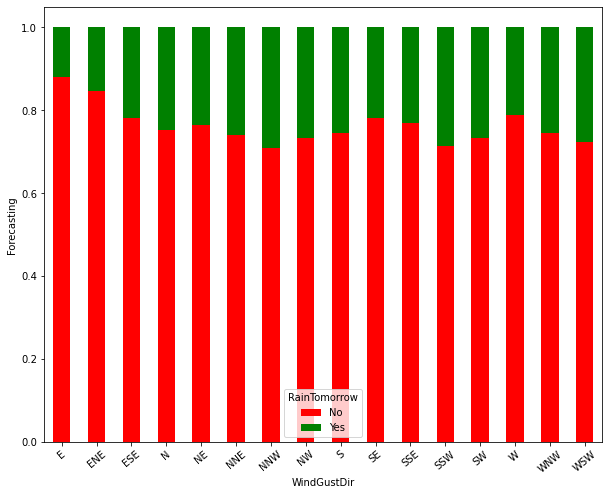

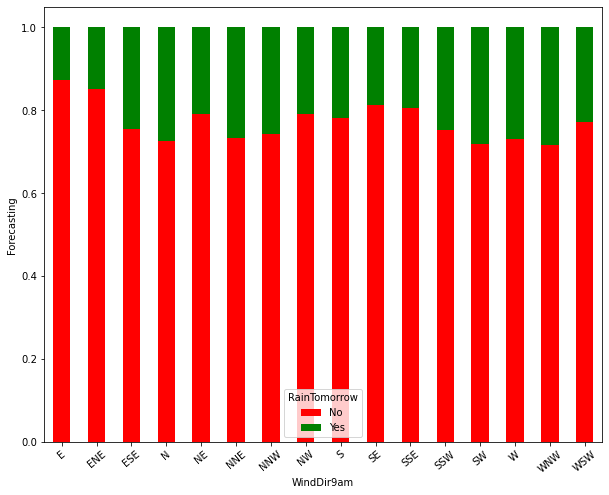

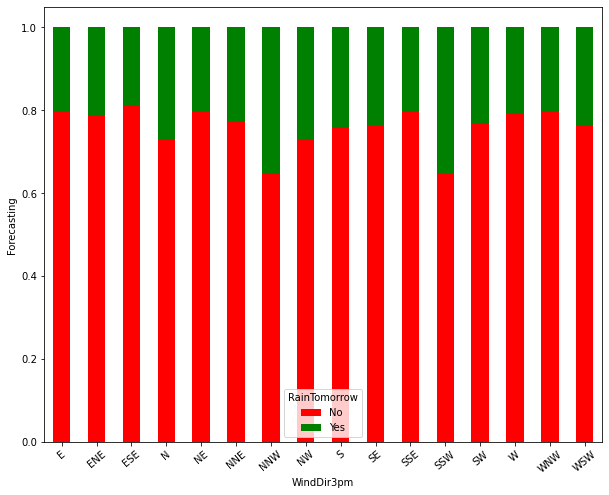

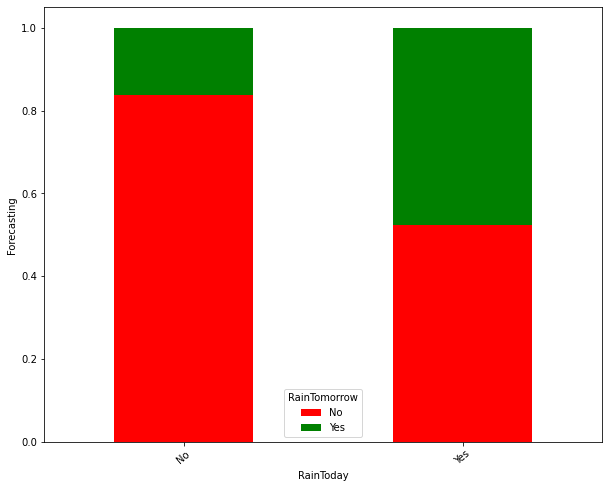

In [206]:
stacked_plot(df, "Location", "RainTomorrow")
stacked_plot(df, "WindGustDir", "RainTomorrow")
stacked_plot(df, "WindDir9am", "RainTomorrow")
stacked_plot(df, "WindDir3pm", "RainTomorrow")
stacked_plot(df, "RainToday", "RainTomorrow")

In [207]:
numerical_column

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

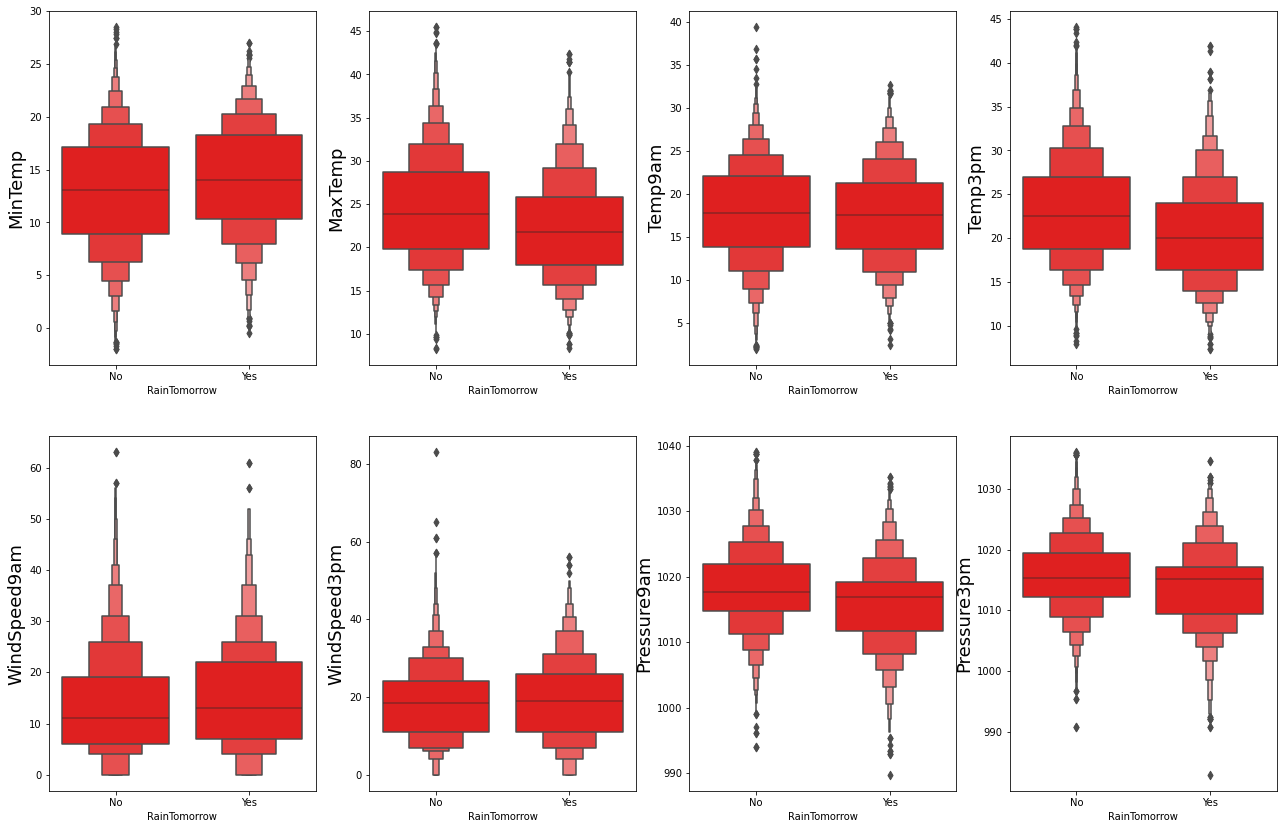

In [208]:
numerical_column1=['MinTemp','MaxTemp','Temp9am','Temp3pm','WindSpeed9am','WindSpeed3pm','Pressure9am','Pressure3pm']
numerical_column2=['Rainfall','Evaporation','Sunshine','WindGustSpeed','Humidity9am','Humidity3pm','Cloud9am','Cloud3pm']

plt.figure(figsize=(22,30), facecolor='white')
plotnumber = 1

for i in df[numerical_column1]:
    if plotnumber<=24 :
        ax = plt.subplot(4,4,plotnumber)
        sns.boxenplot(x=df.RainTomorrow,y=df[i],color='red')
        plt.ylabel(i,fontsize=18)
       
    plotnumber+=1
plt.show()

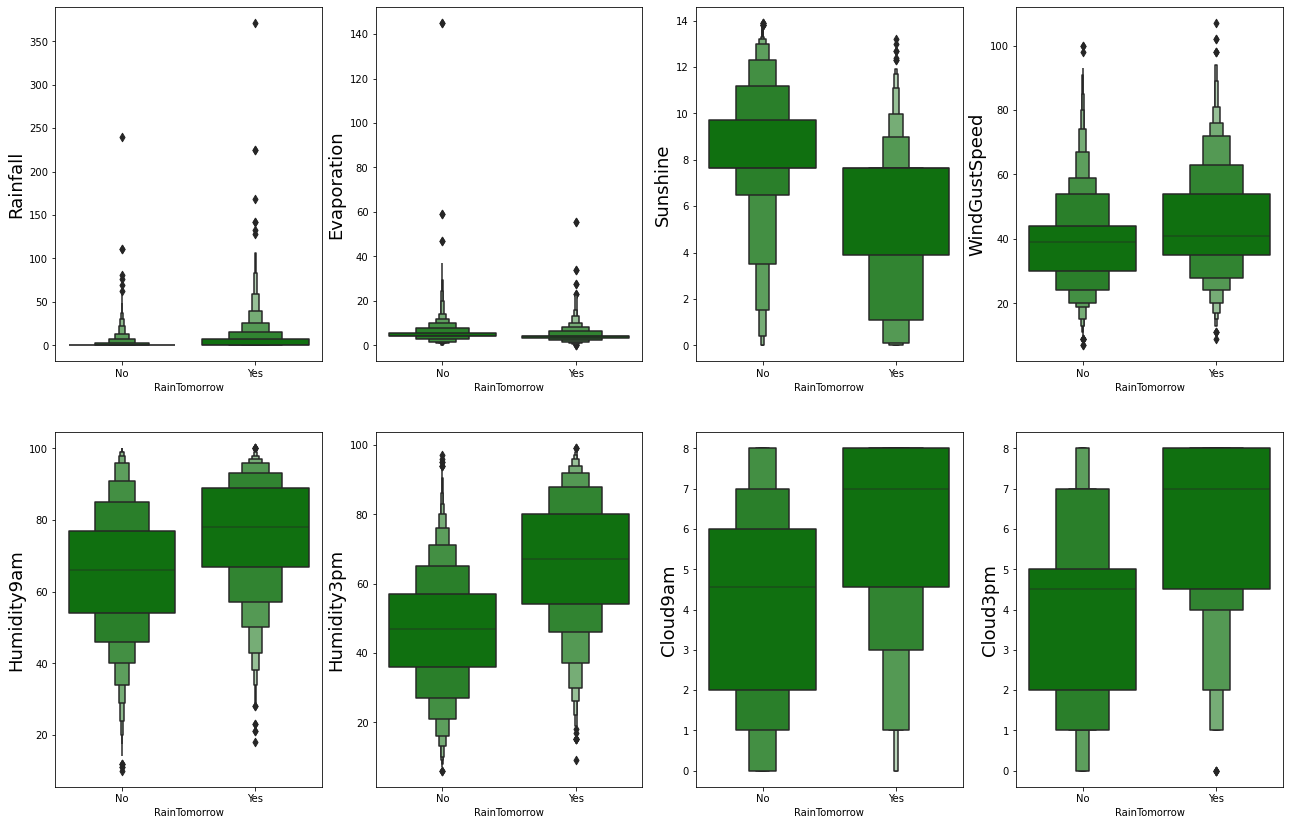

In [209]:
plt.figure(figsize=(22,30), facecolor='white')
plotnumber = 1

for i in df[numerical_column2]:
    if plotnumber<=24 :
        ax = plt.subplot(4,4,plotnumber)
        sns.boxenplot(x=df.RainTomorrow,y=df[i],color='green')
        plt.ylabel(i,fontsize=18)
       
    plotnumber+=1
plt.show()

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

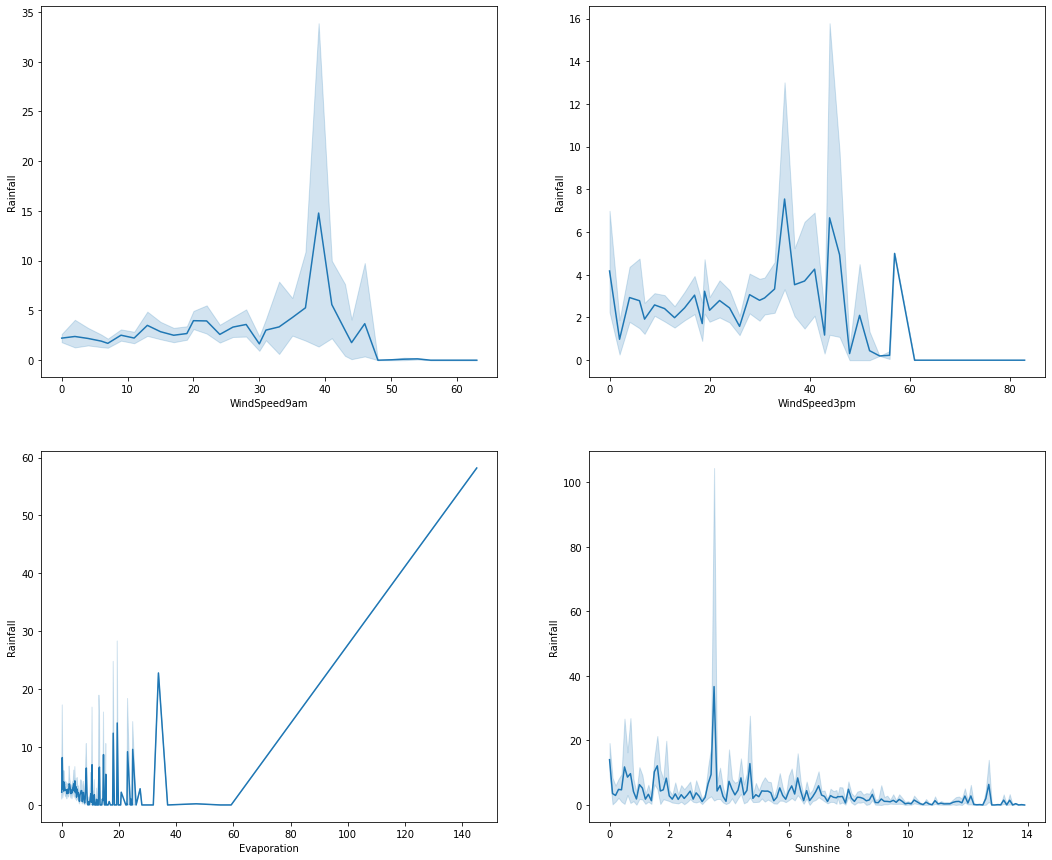

In [210]:
fig,axes=plt.subplots(2,2,figsize=(18,15))
sns.lineplot(x='WindSpeed9am',y='Rainfall',ax=axes[0,0],palette="dark",data=df)
sns.lineplot(x='WindSpeed3pm',y='Rainfall',ax=axes[0,1],palette="dark",data=df)
sns.lineplot(x='Evaporation',y='Rainfall',ax=axes[1,0],palette="dark",data=df)
sns.lineplot(x='Sunshine',y='Rainfall',ax=axes[1,1],palette="dark",data=df)

<AxesSubplot:xlabel='Humidity3pm', ylabel='Rainfall'>

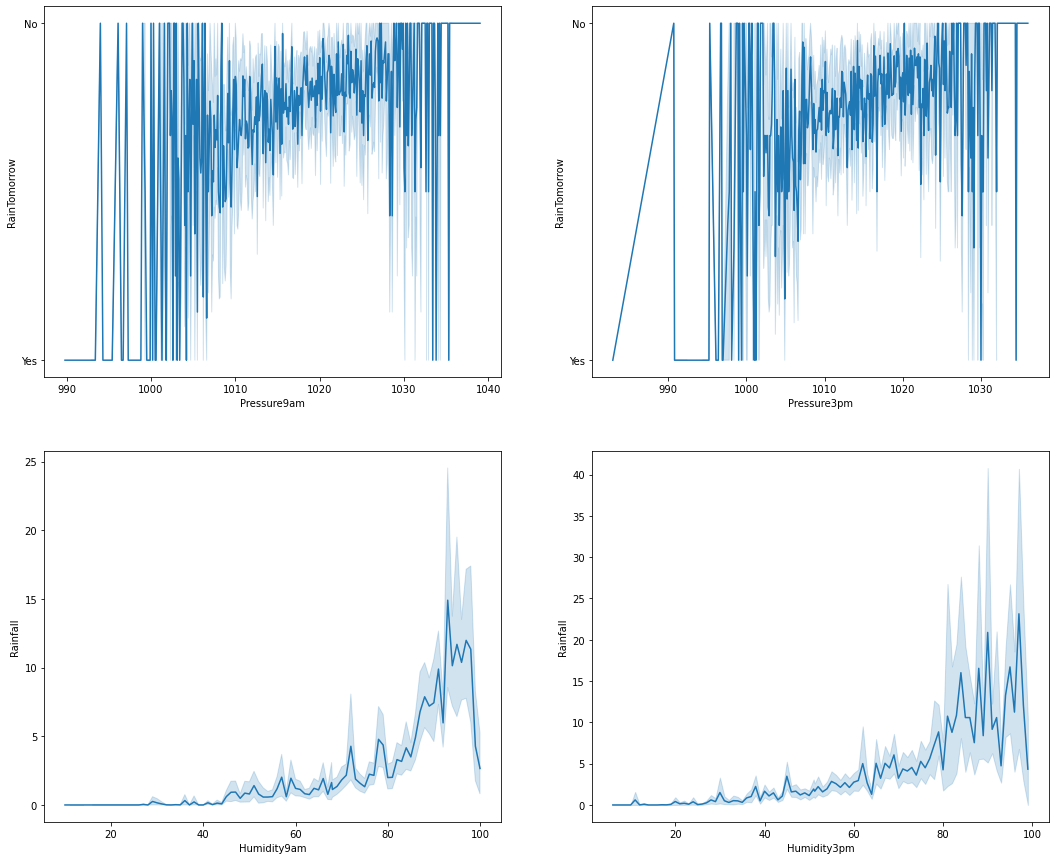

In [211]:
fig,axes=plt.subplots(2,2,figsize=(18,15))

sns.lineplot(x='Pressure9am',y='RainTomorrow',ax=axes[0,0],palette="dark",data=df)

sns.lineplot(x='Pressure3pm',y='RainTomorrow',ax=axes[0,1],palette="dark",data=df)

sns.lineplot(x='Humidity9am',y='Rainfall',ax=axes[1,0],palette="dark",data=df)

sns.lineplot(x='Humidity3pm',y='Rainfall',ax=axes[1,1],palette="dark",data=df)

In [212]:
numerical_column=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_column.append(i)
print(numerical_column)


['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


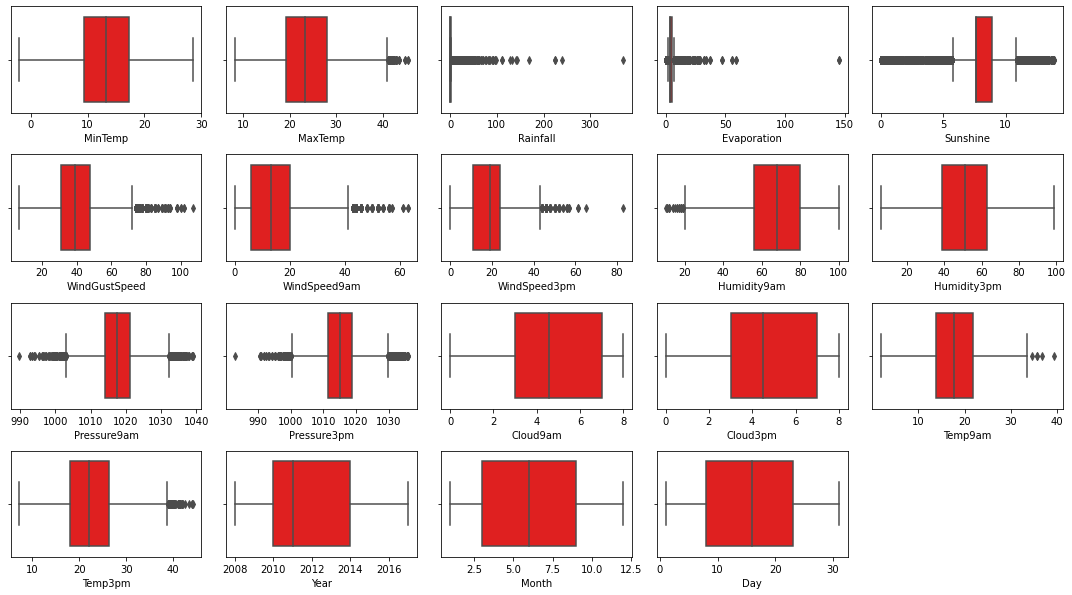

In [213]:
plt.figure(figsize=(15,10),facecolor='white')
graph=1 

for column in numerical_column:

    plt.subplot(5,5,graph)

    sns.boxplot(df[column],color='red',orient='h')

    plt.xlabel(column,fontsize=10)

    graph+=1

    plt.tight_layout()


In the above plot in some column outliers are present

In [214]:
outliers=df[['MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm',
              'Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]

In [215]:
from scipy.stats import zscore
zscore=np.abs(zscore(outliers))
new_dataframe=df[(z<3).all(axis=1)]
new_dataframe

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.900000,0.6,4.0,7.632205,W,44.0,W,WNW,...,1007.1,8.000000,4.503183,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.100000,0.0,4.0,7.632205,WNW,44.0,NNW,WSW,...,1007.8,4.566622,4.503183,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.700000,0.0,4.0,7.632205,WSW,46.0,W,WSW,...,1008.7,4.566622,2.000000,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.000000,0.0,4.0,7.632205,NE,24.0,SE,E,...,1012.8,4.566622,4.503183,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.300000,1.0,4.0,7.632205,W,41.0,ENE,NW,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.400000,0.0,4.0,7.632205,E,31.0,SE,ENE,...,1020.3,4.566622,4.503183,10.1,22.4,No,No,2017,6,21
8421,Uluru,3.6,25.300000,0.0,4.0,7.632205,NNW,22.0,SE,N,...,1019.1,4.566622,4.503183,10.9,24.5,No,No,2017,6,22
8422,Uluru,5.4,26.900000,0.0,4.0,7.632205,N,37.0,SE,WNW,...,1016.8,4.566622,4.503183,12.5,26.1,No,No,2017,6,23
8423,Uluru,7.8,27.000000,0.0,4.0,7.632205,SE,28.0,SSE,N,...,1016.5,3.000000,2.000000,15.1,26.0,No,No,2017,6,24


After removing the outliers we are getting 7985 rows and 25 columns in the new dataset

In [216]:
df.shape
print('old data shape:',df.shape)

old data shape: (8425, 25)


This is the shape of original dataset. Before removing the outliers we had 8425 rows and 25 columns in our dataset.

In [217]:
new_dataframe.shape
print('new data shape:',new_dataframe.shape)

new data shape: (7985, 25)


This is the shape of the new dataset. After removing the outliers we having 7985 rows and 25 columns in our new dataset.

In [218]:
Lost_data = (8425-7985)/8425*100
Lost_data

5.222551928783383

Through zscore method we are losing 5.22% of the data from our dataset

In [219]:
new_dataframe.skew().sort_values()

Sunshine        -0.723889
Cloud9am        -0.356839
Cloud3pm        -0.266786
Humidity9am     -0.231718
MinTemp         -0.084083
Temp9am         -0.037698
Day              0.003167
Pressure9am      0.020309
Pressure3pm      0.044493
Month            0.054642
Humidity3pm      0.124767
WindSpeed3pm     0.299983
MaxTemp          0.314960
Temp3pm          0.334696
Year             0.430639
WindGustSpeed    0.539773
WindSpeed9am     0.721862
Evaporation      1.507592
Rainfall         3.518548
dtype: float64

In the above data the skewness in Rainfall, Evaporation, Sunshine, WindGustSpeed and WindSpeed9am is present.

In [220]:
skewness_columns=["Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed9am"]

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
new_dataframe[skewness_columns] = scaler.fit_transform(new_dataframe[skewness_columns].values)

In [221]:
new_dataframe.skew()

MinTemp         -0.084083
MaxTemp          0.314960
Rainfall         1.041495
Evaporation      0.031917
Sunshine        -0.066413
WindGustSpeed    0.004486
WindSpeed9am    -0.109040
WindSpeed3pm     0.299983
Humidity9am     -0.231718
Humidity3pm      0.124767
Pressure9am      0.020309
Pressure3pm      0.044493
Cloud9am        -0.356839
Cloud3pm        -0.266786
Temp9am         -0.037698
Temp3pm          0.334696
Year             0.430639
Month            0.054642
Day              0.003167
dtype: float64

We still have skewness in rainfall column

In [222]:
 new_dataframe ["Rainfall"] = np.log1p( new_dataframe ["Rainfall"])

In [223]:
new_dataframe.skew()

MinTemp         -0.084083
MaxTemp          0.314960
Rainfall         0.845853
Evaporation      0.031917
Sunshine        -0.066413
WindGustSpeed    0.004486
WindSpeed9am    -0.109040
WindSpeed3pm     0.299983
Humidity9am     -0.231718
Humidity3pm      0.124767
Pressure9am      0.020309
Pressure3pm      0.044493
Cloud9am        -0.356839
Cloud3pm        -0.266786
Temp9am         -0.037698
Temp3pm          0.334696
Year             0.430639
Month            0.054642
Day              0.003167
dtype: float64

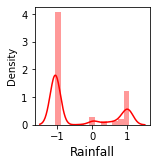

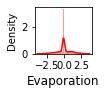

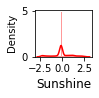

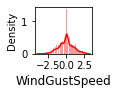

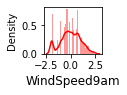

In [224]:
plt.figure(figsize=(12,10))
graph=1 

for column in new_dataframe[skewness_columns]:

    plt.subplot(4,5,graph)

    sns.distplot(new_dataframe[column],color='red')

    plt.xlabel(column,fontsize=12)

    graph+=1

    plt.show()

In the above plot some skewness has been removed

In [225]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

for i in category_column:
    new_dataframe[i]=enc.fit_transform(new_dataframe[i].values.reshape(-1,1))

In [226]:
new_dataframe

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,1.0,13.4,22.900000,0.572859,-0.091216,-0.09744,13.0,0.448762,13.0,14.0,...,1007.1,8.000000,4.503183,16.9,21.8,0.0,0.0,2008,12,1
1,1.0,7.4,25.100000,-1.061358,-0.091216,-0.09744,14.0,0.448762,6.0,15.0,...,1007.8,4.566622,4.503183,17.2,24.3,0.0,0.0,2008,12,2
2,1.0,12.9,25.700000,-1.061358,-0.091216,-0.09744,15.0,0.593589,13.0,15.0,...,1008.7,4.566622,2.000000,21.0,23.2,0.0,0.0,2008,12,3
3,1.0,9.2,28.000000,-1.061358,-0.091216,-0.09744,4.0,-1.249926,9.0,0.0,...,1012.8,4.566622,4.503183,18.1,26.5,0.0,0.0,2008,12,4
4,1.0,17.5,32.300000,0.758864,-0.091216,-0.09744,13.0,0.224833,1.0,7.0,...,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9.0,2.8,23.400000,-1.061358,-0.091216,-0.09744,0.0,-0.591846,9.0,1.0,...,1020.3,4.566622,4.503183,10.1,22.4,0.0,0.0,2017,6,21
8421,9.0,3.6,25.300000,-1.061358,-0.091216,-0.09744,6.0,-1.455883,9.0,3.0,...,1019.1,4.566622,4.503183,10.9,24.5,0.0,0.0,2017,6,22
8422,9.0,5.4,26.900000,-1.061358,-0.091216,-0.09744,3.0,-0.087657,9.0,14.0,...,1016.8,4.566622,4.503183,12.5,26.1,0.0,0.0,2017,6,23
8423,9.0,7.8,27.000000,-1.061358,-0.091216,-0.09744,9.0,-0.863239,10.0,3.0,...,1016.5,3.000000,2.000000,15.1,26.0,0.0,0.0,2017,6,24


In [227]:
new_dataframe.dtypes

Location         float64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir      float64
WindGustSpeed    float64
WindDir9am       float64
WindDir3pm       float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
RainTomorrow     float64
Year               int64
Month              int64
Day                int64
dtype: object

In [228]:
correlation = new_dataframe.corr()
correlation

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
Location,1.000000,0.116368,0.063297,0.009257,0.090083,0.039217,-0.037278,0.256129,-0.040729,-0.031293,...,-0.012099,0.041865,0.027052,0.117682,0.060233,0.003118,0.009408,0.480867,-0.086611,-0.005414
MinTemp,0.116368,1.000000,0.718497,0.052684,0.401175,0.087903,-0.154629,0.249689,-0.044986,-0.154283,...,-0.427861,0.089365,0.036651,0.888657,0.687455,0.061889,0.091188,0.039581,-0.247635,0.010575
MaxTemp,0.063297,0.718497,1.000000,-0.256875,0.493078,0.403248,-0.237556,0.151603,-0.216882,-0.190585,...,-0.414278,-0.252663,-0.248352,0.864792,0.974943,-0.219609,-0.149544,0.119645,-0.165108,0.016566
Rainfall,0.009257,0.052684,-0.256875,1.000000,-0.213229,-0.266311,0.134600,0.062392,0.155931,0.123350,...,-0.021650,0.302880,0.272027,-0.120766,-0.266894,0.878633,0.307305,0.009492,-0.006129,-0.019188
Evaporation,0.090083,0.401175,0.493078,-0.213229,1.000000,0.423173,-0.102864,0.205112,-0.079743,-0.039759,...,-0.280255,-0.150455,-0.175527,0.481121,0.476339,-0.173753,-0.094251,0.073234,-0.028852,0.014616
Sunshine,0.039217,0.087903,0.403248,-0.266311,0.423173,1.000000,-0.112328,0.032269,-0.082366,-0.073512,...,-0.074053,-0.543856,-0.555037,0.285722,0.418614,-0.223092,-0.315233,0.024689,0.001132,0.004663
WindGustDir,-0.037278,-0.154629,-0.237556,0.134600,-0.102864,-0.112328,1.000000,0.010492,0.405505,0.507496,...,-0.008454,0.123446,0.093552,-0.184701,-0.249420,0.121561,0.044209,-0.095564,0.038607,0.017436
WindGustSpeed,0.256129,0.249689,0.151603,0.062392,0.205112,0.032269,0.010492,1.000000,-0.061302,0.082604,...,-0.331121,0.009511,0.059853,0.220389,0.117061,0.076564,0.172525,-0.032181,0.046745,-0.005089
WindDir9am,-0.040729,-0.044986,-0.216882,0.155931,-0.079743,-0.082366,0.405505,-0.061302,1.000000,0.243714,...,0.081278,0.092409,0.062647,-0.101284,-0.224128,0.149134,0.026968,-0.034109,0.018734,-0.009717
WindDir3pm,-0.031293,-0.154283,-0.190585,0.123350,-0.039759,-0.073512,0.507496,0.082604,0.243714,1.000000,...,-0.037244,0.073742,0.054321,-0.172139,-0.202159,0.101024,0.003711,-0.010892,0.028529,-0.000800


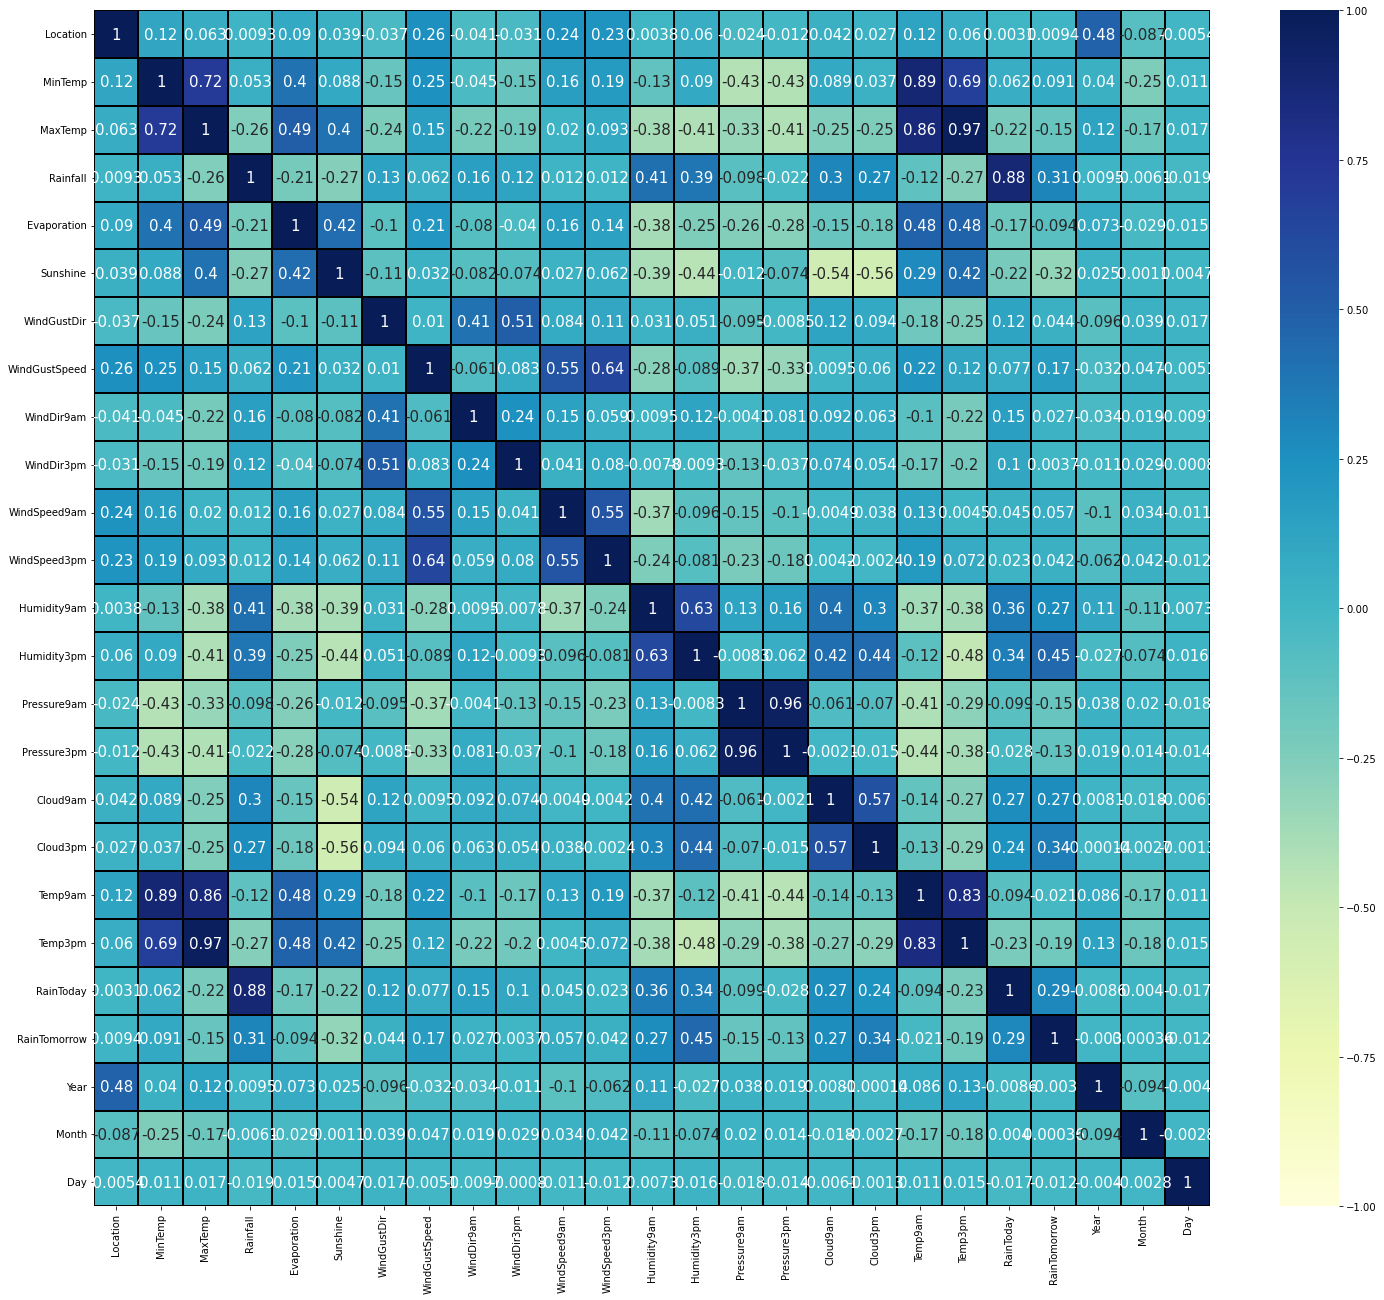

In [229]:
plt.figure(figsize=(25,22))
sns.heatmap(new_dataframe.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0);

This heatmap shows the correlation matrix by visualizing the data.

The above heat map contains both positive and negative correlation.

In the data there is multicollinearity issue present.

Our target Rainfall is highly correlated with RainToday and followed by Humidity 9am and Humidity 3pm.

Least correlation is between rainfall and year,month,windspeen3pm,windspeed 9am,location.

In [230]:
correlation['RainTomorrow'].sort_values(ascending=False)


RainTomorrow     1.000000
Humidity3pm      0.445848
Cloud3pm         0.337937
Rainfall         0.307305
RainToday        0.294476
Humidity9am      0.269716
Cloud9am         0.269610
WindGustSpeed    0.172525
MinTemp          0.091188
WindSpeed9am     0.056656
WindGustDir      0.044209
WindSpeed3pm     0.042457
WindDir9am       0.026968
Location         0.009408
WindDir3pm       0.003711
Month            0.000358
Year            -0.002964
Day             -0.012321
Temp9am         -0.021273
Evaporation     -0.094251
Pressure3pm     -0.125040
MaxTemp         -0.149544
Pressure9am     -0.152797
Temp3pm         -0.191563
Sunshine        -0.315233
Name: RainTomorrow, dtype: float64

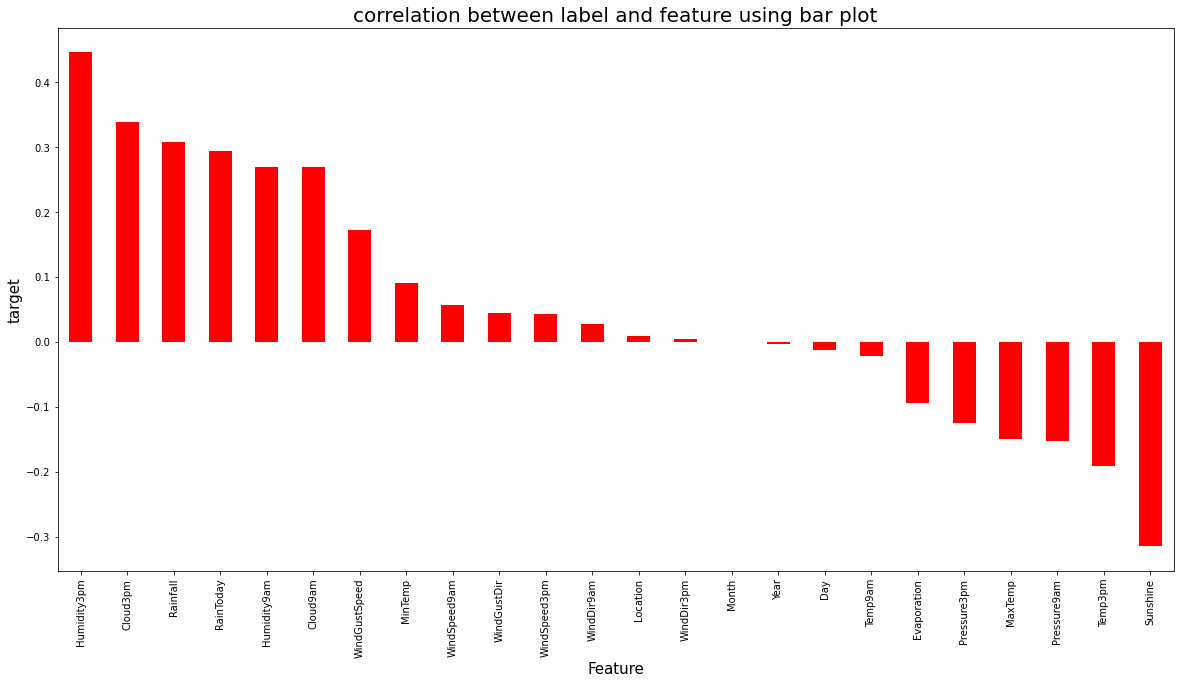

In [231]:
plt.figure(figsize=(20,10))
new_dataframe.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot(kind='bar',color='red')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('target',fontsize=15)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()


Our target Raintomorrow is highly correlated with humidity 3pm followed by cloud 3pm. Rain tomorrow is least correlated with year, month and wind direction at 3pm.

In [232]:
x= new_dataframe.drop("RainTomorrow",axis=1)
y= new_dataframe["RainTomorrow"]

In [233]:
x.shape

(7985, 24)

In [234]:
y.shape

(7985,)

In [235]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
0,-1.508244,0.056720,-0.145362,1.142601,-0.091216,-0.09744,1.229051,0.448762,1.249991,1.400119,...,-1.687192,-1.398140,1.425170,0.013140,-0.137764,-0.098234,-0.542563,-1.661238,1.634864,-1.671471
1,-1.508244,-1.058229,0.221115,-0.689867,-0.091216,-0.09744,1.441765,0.448762,-0.278086,1.626475,...,-1.202518,-1.280023,0.011774,0.013140,-0.083912,0.330173,-0.542563,-1.661238,1.634864,-1.557781
2,-1.508244,-0.036193,0.321064,-0.689867,-0.091216,-0.09744,1.654478,0.593589,1.249991,1.626475,...,-1.703905,-1.128157,0.011774,-1.076523,0.598213,0.141674,-0.542563,-1.661238,1.634864,-1.444092
3,-1.508244,-0.723744,0.704199,-0.689867,-0.091216,-0.09744,-0.685372,-1.249926,0.376804,-1.768865,...,-0.032616,-0.436325,0.011774,0.013140,0.077644,0.707171,-0.542563,-1.661238,1.634864,-1.330402
4,-1.508244,0.818601,1.420496,1.351170,-0.091216,-0.09744,1.229051,0.224833,-1.369569,-0.184373,...,-1.169093,-1.583754,1.013506,1.535342,0.023792,1.255531,-0.542563,-1.661238,1.634864,-1.216713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7980,1.029865,-1.913023,-0.062072,-0.689867,-0.091216,-0.09744,-1.536227,-0.591846,0.376804,-1.542509,...,1.137286,0.829222,0.011774,0.013140,-1.358409,0.004584,-0.542563,2.004923,-0.123342,0.602320
7981,1.029865,-1.764363,0.254431,-0.689867,-0.091216,-0.09744,-0.259945,-1.455883,0.376804,-1.089797,...,0.953444,0.626734,0.011774,0.013140,-1.214803,0.364445,-0.542563,2.004923,-0.123342,0.716009
7982,1.029865,-1.429878,0.520961,-0.689867,-0.091216,-0.09744,-0.898086,-0.087657,0.376804,1.400119,...,0.535622,0.238633,0.011774,0.013140,-0.927593,0.638626,-0.542563,2.004923,-0.123342,0.829699
7983,1.029865,-0.983899,0.537619,-0.689867,-0.091216,-0.09744,0.378196,-0.863239,0.595101,-1.089797,...,0.268216,0.188011,-0.633147,-1.076523,-0.460876,0.621489,-0.542563,2.004923,-0.123342,0.943388


In [236]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [237]:
vif_calc()

    VIF Factor       features
0     1.587783       Location
1     8.840149        MinTemp
2    26.398592        MaxTemp
3     4.799719       Rainfall
4     1.646335    Evaporation
5     2.073685       Sunshine
6     1.613159    WindGustDir
7     2.299982  WindGustSpeed
8     1.364139     WindDir9am
9     1.490670     WindDir3pm
10    1.998982   WindSpeed9am
11    2.004964   WindSpeed3pm
12    4.009335    Humidity9am
13    5.371095    Humidity3pm
14   19.863732    Pressure9am
15   19.004349    Pressure3pm
16    1.934323       Cloud9am
17    1.824896       Cloud3pm
18   17.514623        Temp9am
19   33.241000        Temp3pm
20    4.438807      RainToday
21    1.521168           Year
22    1.155839          Month
23    1.004385            Day


In the above data we have high multicolinearity in column MaxTemp, Pressure9am, Pressure3pm, Temp9am and Temp3pm.

In [238]:
x.drop("Temp3pm",axis=1,inplace=True)

x.drop("Temp9am",axis=1,inplace=True)

In [239]:
vif_calc()

    VIF Factor       features
0     1.584881       Location
1     4.780122        MinTemp
2     5.770551        MaxTemp
3     4.798637       Rainfall
4     1.643647    Evaporation
5     2.065171       Sunshine
6     1.608138    WindGustDir
7     2.247232  WindGustSpeed
8     1.363102     WindDir9am
9     1.488404     WindDir3pm
10    1.979773   WindSpeed9am
11    1.957527   WindSpeed3pm
12    2.539021    Humidity9am
13    2.887045    Humidity3pm
14   19.250773    Pressure9am
15   18.499112    Pressure3pm
16    1.911620       Cloud9am
17    1.811180       Cloud3pm
18    4.437887      RainToday
19    1.496973           Year
20    1.127152          Month
21    1.003697            Day


In [240]:
x.drop("Pressure9am",axis=1,inplace=True)

In [241]:
vif_calc()

    VIF Factor       features
0     1.584707       Location
1     4.565543        MinTemp
2     5.512058        MaxTemp
3     4.792085       Rainfall
4     1.631500    Evaporation
5     2.058898       Sunshine
6     1.594142    WindGustDir
7     2.229179  WindGustSpeed
8     1.341356     WindDir9am
9     1.420589     WindDir3pm
10    1.974299   WindSpeed9am
11    1.942437   WindSpeed3pm
12    2.537076    Humidity9am
13    2.887045    Humidity3pm
14    1.439327    Pressure3pm
15    1.911004       Cloud9am
16    1.810147       Cloud3pm
17    4.435322      RainToday
18    1.495969           Year
19    1.126615          Month
20    1.003094            Day


In [242]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x, y = sm.fit_resample(x,y)

In [243]:
y.value_counts()

0.0    6163
1.0    6163
Name: RainTomorrow, dtype: int64

After the SMOTE technique our data is balanced

In [244]:
new_dataframe.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,1.0,13.4,22.9,0.572859,-0.091216,-0.09744,13.0,0.448762,13.0,14.0,...,1007.1,8.000000,4.503183,16.9,21.8,0.0,0.0,2008,12,1
1,1.0,7.4,25.1,-1.061358,-0.091216,-0.09744,14.0,0.448762,6.0,15.0,...,1007.8,4.566622,4.503183,17.2,24.3,0.0,0.0,2008,12,2
2,1.0,12.9,25.7,-1.061358,-0.091216,-0.09744,15.0,0.593589,13.0,15.0,...,1008.7,4.566622,2.000000,21.0,23.2,0.0,0.0,2008,12,3
3,1.0,9.2,28.0,-1.061358,-0.091216,-0.09744,4.0,-1.249926,9.0,0.0,...,1012.8,4.566622,4.503183,18.1,26.5,0.0,0.0,2008,12,4
4,1.0,17.5,32.3,0.758864,-0.091216,-0.09744,13.0,0.224833,1.0,7.0,...,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0,2008,12,5


In [245]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score, confusion_matrix,precision_score, f1_score, accuracy_score, classification_report

In [246]:
maxAccu=0
maxRS=0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    predlr=lr.predict(x_test)
    acc=accuracy_score(y_test, predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.7888047593293672  on Random_state  71


 Best accuracy is 78% on random state 71

In [247]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=90)

In [252]:
lr=LogisticRegression()

lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.7650081124932396
[[1427  414]
 [ 455 1402]]
              precision    recall  f1-score   support

         0.0       0.76      0.78      0.77      1841
         1.0       0.77      0.75      0.76      1857

    accuracy                           0.77      3698
   macro avg       0.77      0.77      0.76      3698
weighted avg       0.77      0.77      0.76      3698




The accuracy score for LogisticRegression is 76.50%.

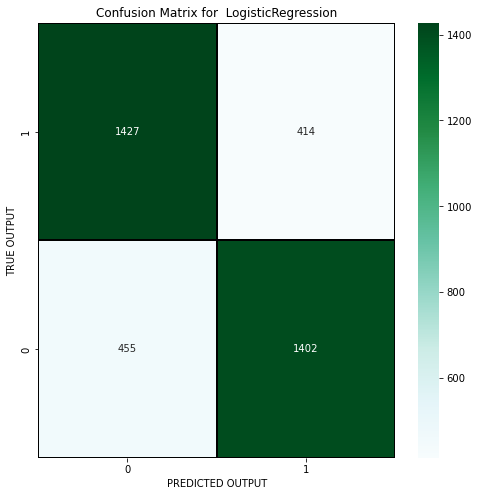

In [253]:
CM = confusion_matrix(y_test,predlr)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(8,8))
sns.heatmap(CM, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED OUTPUT")
plt.ylabel("TRUE OUTPUT")
plt.title('Confusion Matrix for  LogisticRegression')
plt.show()

In [254]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    dtc = DecisionTreeClassifier()
    dtc.fit(x_train, y_train)
    preddtc=dtc.predict(x_test)
    acc=accuracy_score(y_test, preddtc)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8820984315846403  on Random_state  61


The best random accuracy score is 88.20% on 61 state

In [256]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=90)

In [257]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8631692806922661
[[1578  263]
 [ 243 1614]]
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86      1841
         1.0       0.86      0.87      0.86      1857

    accuracy                           0.86      3698
   macro avg       0.86      0.86      0.86      3698
weighted avg       0.86      0.86      0.86      3698



The accuracy score for decision tree is 86.31%

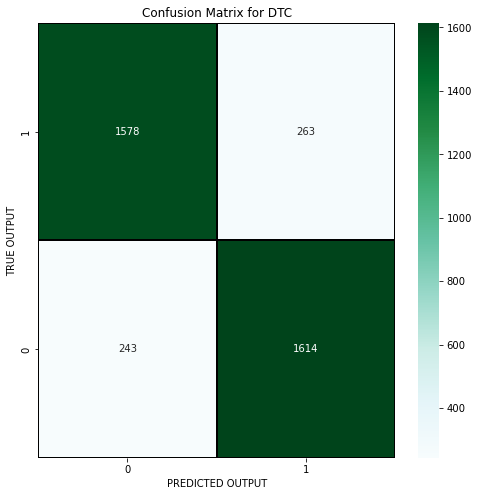

In [258]:
CM = confusion_matrix(y_test,preddtc)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(8,8))
sns.heatmap(CM, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED OUTPUT")
plt.ylabel("TRUE OUTPUT")
plt.title('Confusion Matrix for DTC')
plt.show()

In [263]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))
    
svmkernel('rbf')

0.8561384532179557
[[1520  321]
 [ 211 1646]]
              precision    recall  f1-score   support

         0.0       0.88      0.83      0.85      1841
         1.0       0.84      0.89      0.86      1857

    accuracy                           0.86      3698
   macro avg       0.86      0.86      0.86      3698
weighted avg       0.86      0.86      0.86      3698



The acccuracy score for the svc is 85.61%

In [265]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
RFC.score(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))


0.9234721471065441
[[1685  156]
 [ 127 1730]]
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92      1841
         1.0       0.92      0.93      0.92      1857

    accuracy                           0.92      3698
   macro avg       0.92      0.92      0.92      3698
weighted avg       0.92      0.92      0.92      3698



The accuracy score for the random forest classifier is 92%

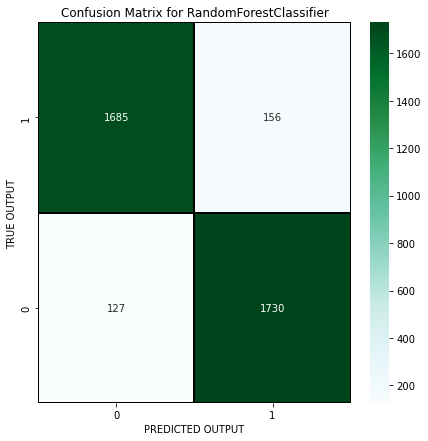

In [266]:
CM = confusion_matrix(y_test,predRFC)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(CM, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED OUTPUT")
plt.ylabel("TRUE OUTPUT")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

In [268]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))



0.8531638723634397
[[1378  463]
 [  80 1777]]
              precision    recall  f1-score   support

         0.0       0.95      0.75      0.84      1841
         1.0       0.79      0.96      0.87      1857

    accuracy                           0.85      3698
   macro avg       0.87      0.85      0.85      3698
weighted avg       0.87      0.85      0.85      3698




The accuracy score for KNN is 85.31%

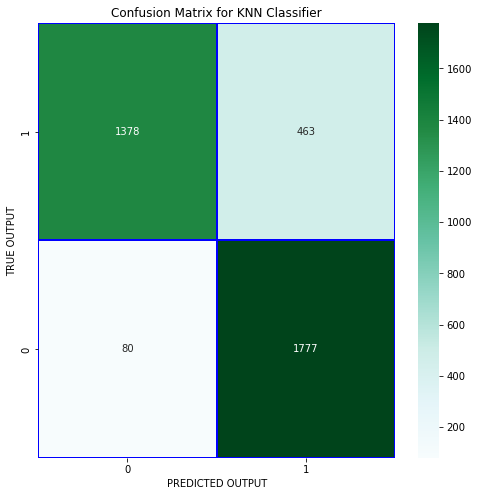

In [269]:
CM= confusion_matrix(y_test,predknn)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(8,8))
sns.heatmap(CM, annot = True,linewidths=.2, linecolor="blue", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED OUTPUT")
plt.ylabel("TRUE OUTPUT")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

In [270]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
GB.score(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.8491076257436452
[[1571  270]
 [ 288 1569]]
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85      1841
         1.0       0.85      0.84      0.85      1857

    accuracy                           0.85      3698
   macro avg       0.85      0.85      0.85      3698
weighted avg       0.85      0.85      0.85      3698



The accuracy score for gradient boosting classifier is 84.91%

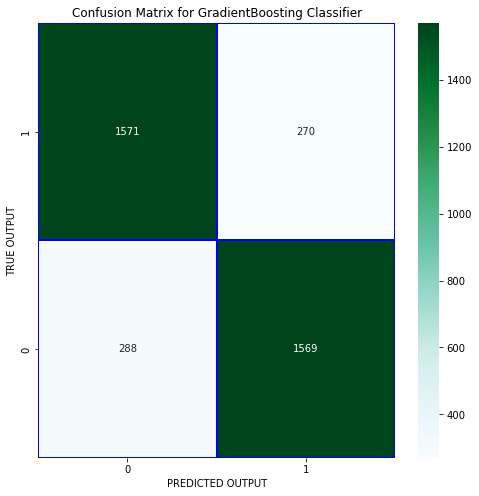

In [271]:
CM= confusion_matrix(y_test,predGB)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(8,8))
sns.heatmap(CM, annot = True,linewidths=.2, linecolor="blue", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED OUTPUT")
plt.ylabel("TRUE OUTPUT")
plt.title('Confusion Matrix for GradientBoosting Classifier')
plt.show()

In [272]:
from sklearn.model_selection import cross_val_score

In [274]:
print("dtc crossvalidation score",cross_val_score(dtc,x,y,cv=5).mean())
print("RFC crossvalidation score",cross_val_score(RFC,x,y,cv=5).mean())
print("lr crossvalidationscore",cross_val_score(lr,x,y,cv=5).mean())
print("knn crossvalidationscore",cross_val_score(knn,x,y,cv=5).mean())
print("GB crossvalidationscore",cross_val_score(GB,x,y,cv=5).mean())




dtc crossvalidation score 0.7204402593321917
RFC crossvalidation score 0.7874532835199689
lr crossvalidationscore 0.7149129828959859
knn crossvalidationscore 0.7234350822298883
GB crossvalidationscore 0.6792214440940401


In the above data there are the cross validation scores for the different models

In [280]:
from sklearn.model_selection import GridSearchCV

In [281]:
parameters = {'criterion':["gini","entropy"],
              'max_features':['auto','sqrt', 'log2'],
              'max_depth':[10,20,30,40,50],
              'splitter':['best','random']}

In [282]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [283]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [284]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [292]:
Rain= DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='sqrt',splitter='best')
Rain.fit(x_train, y_train)
pred=Rain.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

86.15467820443483



The final accuracy of the decision tree classifier model is86.15%

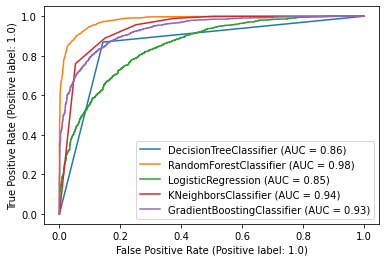

In [293]:
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 
disp = plot_roc_curve(dtc,x_test,y_test)
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)    
plot_roc_curve(lr, x_test, y_test, ax=disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GB, x_test, y_test, ax=disp.ax_)
plt.legend(prop={'size':10}, loc='lower right')
plt.show()


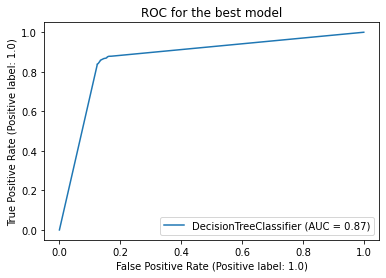

In [294]:
plot_roc_curve(Rain, x_test, y_test)
plt.title("ROC for the best model")
plt.show()



In [295]:
import joblib
joblib.dump(Rain,"Rain_Model.obj")

['Rain_Model.obj']

In [296]:
model=joblib.load("Rain_Model.obj")

predict = model.predict(x_test)
predict

array([0., 1., 0., ..., 0., 1., 0.])

# Prediction for Rainfall

In [297]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.900000,0.6,4.0,7.632205,W,44.0,W,WNW,...,1007.1,8.000000,4.503183,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.100000,0.0,4.0,7.632205,WNW,44.0,NNW,WSW,...,1007.8,4.566622,4.503183,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.700000,0.0,4.0,7.632205,WSW,46.0,W,WSW,...,1008.7,4.566622,2.000000,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.000000,0.0,4.0,7.632205,NE,24.0,SE,E,...,1012.8,4.566622,4.503183,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.300000,1.0,4.0,7.632205,W,41.0,ENE,NW,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.400000,0.0,4.0,7.632205,E,31.0,SE,ENE,...,1020.3,4.566622,4.503183,10.1,22.4,No,No,2017,6,21
8421,Uluru,3.6,25.300000,0.0,4.0,7.632205,NNW,22.0,SE,N,...,1019.1,4.566622,4.503183,10.9,24.5,No,No,2017,6,22
8422,Uluru,5.4,26.900000,0.0,4.0,7.632205,N,37.0,SE,WNW,...,1016.8,4.566622,4.503183,12.5,26.1,No,No,2017,6,23
8423,Uluru,7.8,27.000000,0.0,4.0,7.632205,SE,28.0,SSE,N,...,1016.5,3.000000,2.000000,15.1,26.0,No,No,2017,6,24


In [298]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'Day'],
      dtype='object')

In [299]:
category_column=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        category_column.append(i)
print(category_column)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [300]:
numerical_column=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_column.append(i)
print(numerical_column)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


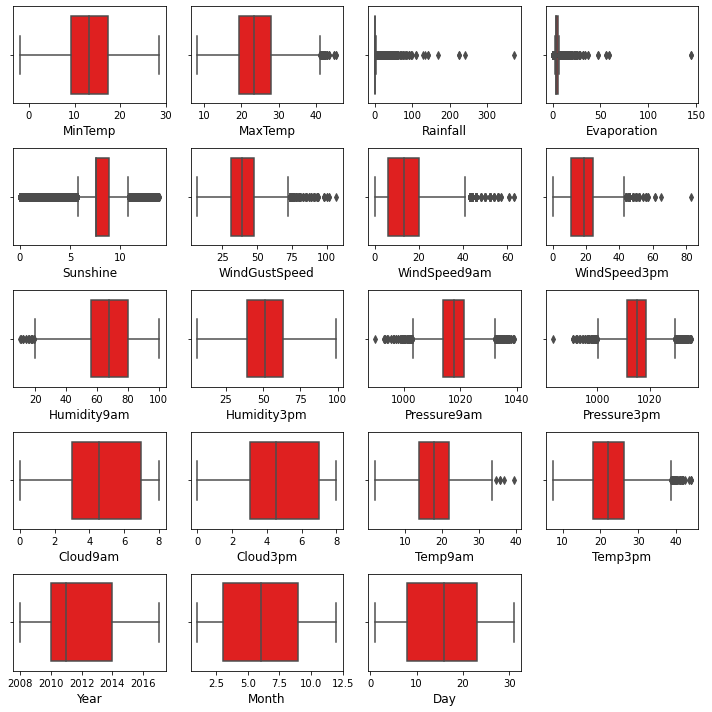

In [303]:
plt.figure(figsize=(10,10),facecolor='white')
graph=1 

for column in numerical_column:

    plt.subplot(5,4,graph)

    sns.boxplot(df[column],color='red',orient='h')

    plt.xlabel(column,fontsize=12)

    graph+=1

    plt.tight_layout()

In [304]:
outlier = df[['MaxTemp','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm',
              'Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]


In [306]:
from scipy.stats import zscore

z=np.abs(zscore(outlier))
df1=df[(z<3).all(axis=1)]
df1

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.900000,0.6,4.0,7.632205,W,44.0,W,WNW,...,1007.1,8.000000,4.503183,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.100000,0.0,4.0,7.632205,WNW,44.0,NNW,WSW,...,1007.8,4.566622,4.503183,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.700000,0.0,4.0,7.632205,WSW,46.0,W,WSW,...,1008.7,4.566622,2.000000,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.000000,0.0,4.0,7.632205,NE,24.0,SE,E,...,1012.8,4.566622,4.503183,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.300000,1.0,4.0,7.632205,W,41.0,ENE,NW,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.400000,0.0,4.0,7.632205,E,31.0,SE,ENE,...,1020.3,4.566622,4.503183,10.1,22.4,No,No,2017,6,21
8421,Uluru,3.6,25.300000,0.0,4.0,7.632205,NNW,22.0,SE,N,...,1019.1,4.566622,4.503183,10.9,24.5,No,No,2017,6,22
8422,Uluru,5.4,26.900000,0.0,4.0,7.632205,N,37.0,SE,WNW,...,1016.8,4.566622,4.503183,12.5,26.1,No,No,2017,6,23
8423,Uluru,7.8,27.000000,0.0,4.0,7.632205,SE,28.0,SSE,N,...,1016.5,3.000000,2.000000,15.1,26.0,No,No,2017,6,24


In [307]:
df.shape

(8425, 25)

In [308]:
df1.shape

(8093, 25)

In [309]:
loss=(8425-8093)/8425*100
loss


3.940652818991098

we have loss 3.9% data through zscore method

In [310]:
df1.skew().sort_values()

Sunshine         -0.729902
Cloud9am         -0.364883
Cloud3pm         -0.273710
Humidity9am      -0.237284
MinTemp          -0.094080
Temp9am          -0.038386
Day               0.006400
Pressure9am       0.024334
Pressure3pm       0.047145
Month             0.059218
Humidity3pm       0.125490
WindSpeed3pm      0.300900
MaxTemp           0.322224
Temp3pm           0.341939
Year              0.431387
WindGustSpeed     0.542002
WindSpeed9am      0.722622
Evaporation       1.510004
Rainfall         13.876101
dtype: float64

In [311]:
skewness=["Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed9am"]



In [312]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df1[skewness] = scaler.fit_transform(df1[skewness].values)

In [313]:
df1.skew()

MinTemp          -0.094080
MaxTemp           0.322224
Rainfall         13.876101
Evaporation       0.032957
Sunshine         -0.078497
WindGustSpeed     0.004766
WindSpeed9am     -0.108592
WindSpeed3pm      0.300900
Humidity9am      -0.237284
Humidity3pm       0.125490
Pressure9am       0.024334
Pressure3pm       0.047145
Cloud9am         -0.364883
Cloud3pm         -0.273710
Temp9am          -0.038386
Temp3pm           0.341939
Year              0.431387
Month             0.059218
Day               0.006400
dtype: float64

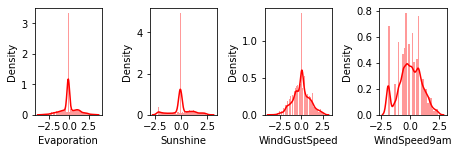

In [314]:
plt.figure(figsize=(8,8))
graph=1 

for column in df1[skewness]:

    plt.subplot(4,5,graph)

    sns.distplot(df1[column],color='red')

    plt.xlabel(column,fontsize=10)

    graph+=1

    plt.tight_layout()

In [316]:
from sklearn.preprocessing import OrdinalEncoder
ENC=OrdinalEncoder()

In [317]:
for i in category_column:
    df1[i]=ENC.fit_transform(df1[i].values.reshape(-1,1))

In [318]:
df1

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,1.0,13.4,22.900000,0.6,-0.091942,-0.084471,13.0,0.444300,13.0,14.0,...,1007.1,8.000000,4.503183,16.9,21.8,0.0,0.0,2008,12,1
1,1.0,7.4,25.100000,0.0,-0.091942,-0.084471,14.0,0.444300,6.0,15.0,...,1007.8,4.566622,4.503183,17.2,24.3,0.0,0.0,2008,12,2
2,1.0,12.9,25.700000,0.0,-0.091942,-0.084471,15.0,0.589122,13.0,15.0,...,1008.7,4.566622,2.000000,21.0,23.2,0.0,0.0,2008,12,3
3,1.0,9.2,28.000000,0.0,-0.091942,-0.084471,4.0,-1.254877,9.0,0.0,...,1012.8,4.566622,4.503183,18.1,26.5,0.0,0.0,2008,12,4
4,1.0,17.5,32.300000,1.0,-0.091942,-0.084471,13.0,0.220364,1.0,7.0,...,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9.0,2.8,23.400000,0.0,-0.091942,-0.084471,0.0,-0.596482,9.0,1.0,...,1020.3,4.566622,4.503183,10.1,22.4,0.0,0.0,2017,6,21
8421,9.0,3.6,25.300000,0.0,-0.091942,-0.084471,6.0,-1.460967,9.0,3.0,...,1019.1,4.566622,4.503183,10.9,24.5,0.0,0.0,2017,6,22
8422,9.0,5.4,26.900000,0.0,-0.091942,-0.084471,3.0,-0.092163,9.0,14.0,...,1016.8,4.566622,4.503183,12.5,26.1,0.0,0.0,2017,6,23
8423,9.0,7.8,27.000000,0.0,-0.091942,-0.084471,9.0,-0.867984,10.0,3.0,...,1016.5,3.000000,2.000000,15.1,26.0,0.0,0.0,2017,6,24


In [319]:
df1.dtypes

Location         float64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir      float64
WindGustSpeed    float64
WindDir9am       float64
WindDir3pm       float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
RainTomorrow     float64
Year               int64
Month              int64
Day                int64
dtype: object

In [320]:
correlation = df1.corr()
correlation

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
Location,1.000000,0.111697,0.060070,0.001231,0.090477,0.043228,-0.036992,0.254430,-0.038355,-0.028718,...,-0.009039,0.040501,0.024569,0.113190,0.056906,0.002087,0.005805,0.482757,-0.085997,-0.006003
MinTemp,0.111697,1.000000,0.715427,0.089077,0.398536,0.078041,-0.153011,0.249498,-0.043164,-0.155231,...,-0.426520,0.096198,0.043586,0.887796,0.684245,0.072936,0.097253,0.037155,-0.248876,0.009382
MaxTemp,0.060070,0.715427,1.000000,-0.083805,0.490402,0.400417,-0.235538,0.147795,-0.217231,-0.191855,...,-0.414564,-0.252693,-0.247544,0.863871,0.974819,-0.220027,-0.150733,0.117125,-0.164611,0.015657
Rainfall,0.001231,0.089077,-0.083805,1.000000,-0.049190,-0.158230,0.034890,0.076281,0.089932,0.034865,...,-0.011528,0.180879,0.150672,-0.002729,-0.087698,0.460511,0.216970,0.003498,-0.023028,-0.013889
Evaporation,0.090477,0.398536,0.490402,-0.049190,1.000000,0.416848,-0.101740,0.203549,-0.077607,-0.037833,...,-0.279002,-0.147047,-0.173465,0.477843,0.474193,-0.168739,-0.092668,0.072749,-0.030935,0.012280
Sunshine,0.043228,0.078041,0.400417,-0.158230,0.416848,1.000000,-0.112612,0.025577,-0.084600,-0.071877,...,-0.071821,-0.547469,-0.557970,0.279066,0.415635,-0.236961,-0.321369,0.029231,0.002067,0.004301
WindGustDir,-0.036992,-0.153011,-0.235538,0.034890,-0.101740,-0.112612,1.000000,0.011637,0.404513,0.507388,...,-0.010578,0.121891,0.092740,-0.184072,-0.247549,0.120371,0.042777,-0.093894,0.039163,0.018737
WindGustSpeed,0.254430,0.249498,0.147795,0.076281,0.203549,0.025577,0.011637,1.000000,-0.058889,0.082673,...,-0.328303,0.014777,0.064052,0.217826,0.113127,0.082746,0.177111,-0.031171,0.044586,-0.006136
WindDir9am,-0.038355,-0.043164,-0.217231,0.089932,-0.077607,-0.084600,0.404513,-0.058889,1.000000,0.245708,...,0.081645,0.095540,0.063388,-0.101903,-0.224105,0.154293,0.031208,-0.030979,0.017534,-0.011161
WindDir3pm,-0.028718,-0.155231,-0.191855,0.034865,-0.037833,-0.071877,0.507388,0.082673,0.245708,1.000000,...,-0.036617,0.072076,0.051984,-0.174392,-0.203600,0.099372,0.003784,-0.007105,0.030505,-0.000469


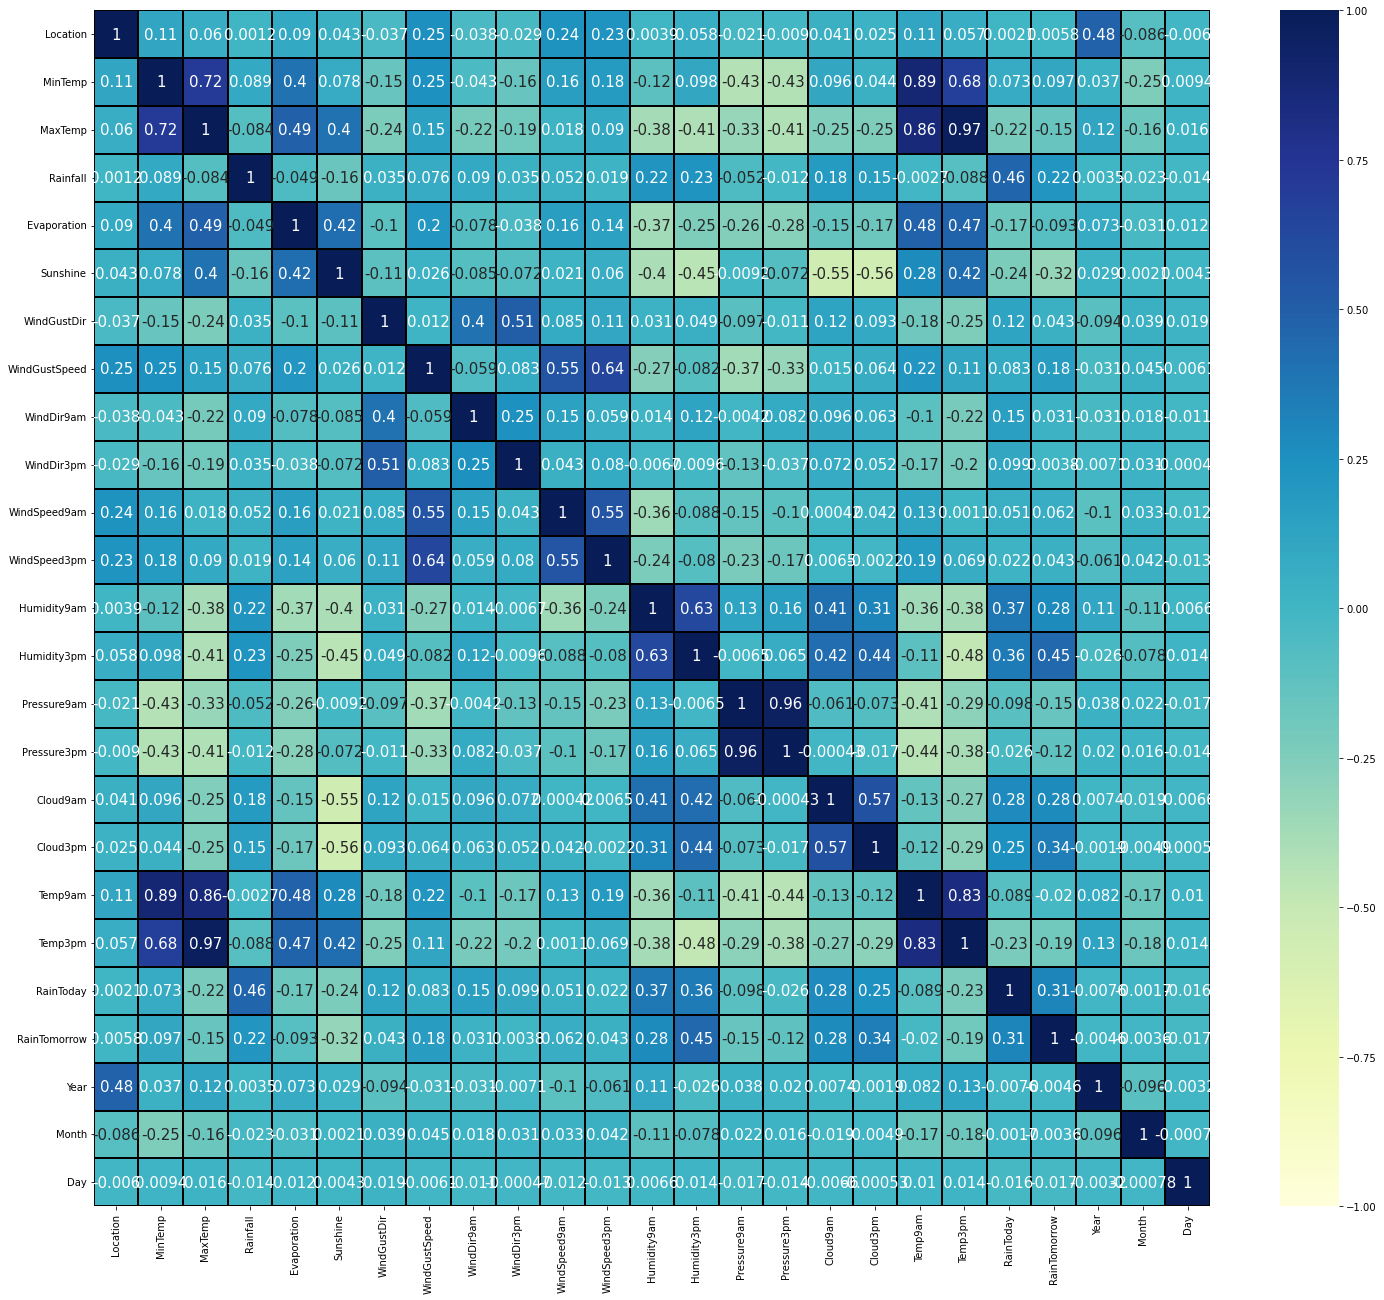

In [321]:
plt.figure(figsize=(25,22))
sns.heatmap(df1.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0);

We have multicollinearity. Our target Rainfall is highly correlated with RainToday and followed by Humidity 9am and Humidity 3pm. Least correlation is between rainfall and year,month,windspeen3pm,windspeed 9am,location.

In [322]:
correlation['Rainfall'].sort_values(ascending=False)

Rainfall         1.000000
RainToday        0.460511
Humidity3pm      0.233639
Humidity9am      0.222702
RainTomorrow     0.216970
Cloud9am         0.180879
Cloud3pm         0.150672
WindDir9am       0.089932
MinTemp          0.089077
WindGustSpeed    0.076281
WindSpeed9am     0.052274
WindGustDir      0.034890
WindDir3pm       0.034865
WindSpeed3pm     0.019358
Year             0.003498
Location         0.001231
Temp9am         -0.002729
Pressure3pm     -0.011528
Day             -0.013889
Month           -0.023028
Evaporation     -0.049190
Pressure9am     -0.051945
MaxTemp         -0.083805
Temp3pm         -0.087698
Sunshine        -0.158230
Name: Rainfall, dtype: float64

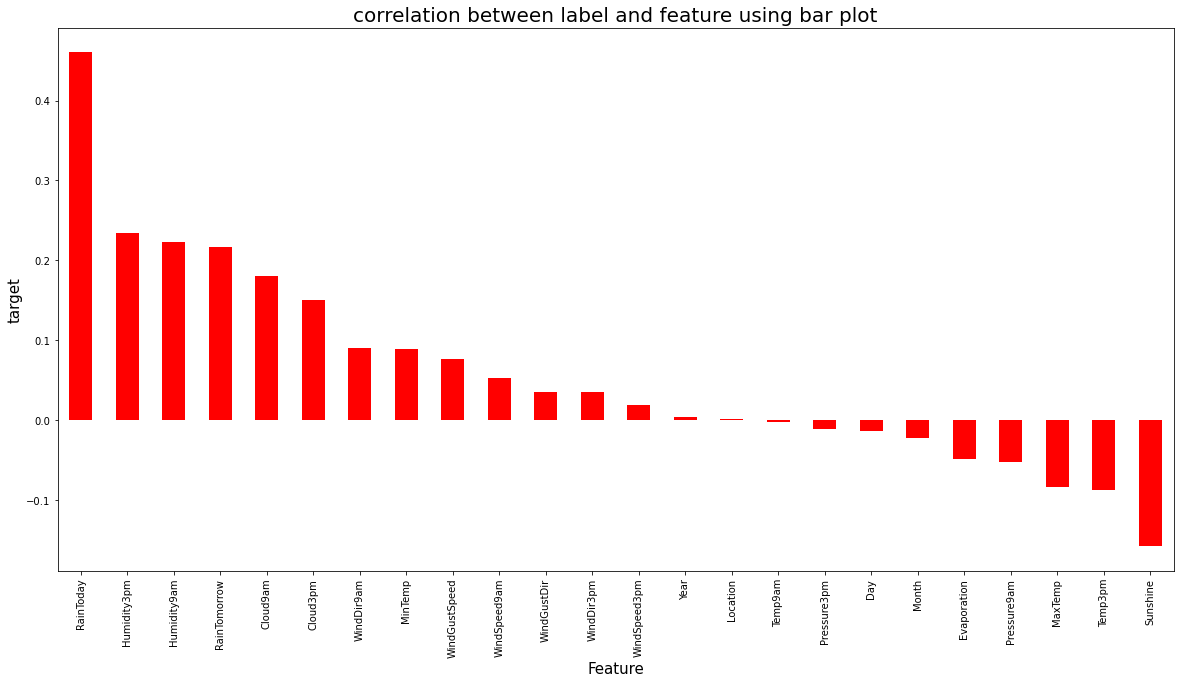

In [323]:
plt.figure(figsize=(20,10))
df1.corr()['Rainfall'].sort_values(ascending=False).drop(['Rainfall']).plot(kind='bar',color='red')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('target',fontsize=15)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

In [324]:
x = df1.drop("Rainfall",axis=1)
y = df1["Rainfall"]

In [325]:
x.shape

(8093, 24)

In [326]:
y.shape

(8093,)

In [327]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,-1.507644,0.049765,-0.142577,-0.091942,-0.084471,1.228407,0.444300,1.243621,1.400477,0.784749,...,-1.400106,1.410182,0.002863,-0.139666,-0.094859,-0.558464,-0.553132,-1.659660,1.635359,-1.670629
1,-1.507644,-1.067639,0.225202,-0.091942,-0.084471,1.441223,0.444300,-0.283173,1.626995,-0.980984,...,-1.281911,-0.000555,0.002863,-0.085607,0.334932,-0.558464,-0.553132,-1.659660,1.635359,-1.557006
2,-1.507644,-0.043352,0.325506,-0.091942,-0.084471,1.654040,0.589122,1.243621,1.626995,0.701058,...,-1.129947,-0.000555,-1.084881,0.599141,0.145824,-0.558464,-0.553132,-1.659660,1.635359,-1.443384
3,-1.507644,-0.732418,0.710002,-0.091942,-0.084471,-0.686939,-1.254877,0.371167,-1.770777,-0.060454,...,-0.437665,-0.000555,0.002863,0.076570,0.713149,-0.558464,-0.553132,-1.659660,1.635359,-1.329761
4,-1.507644,0.813325,1.428843,-0.091942,-0.084471,1.228407,0.220364,-1.373740,-0.185150,-0.538110,...,-1.585840,0.999293,1.522385,0.022511,1.263282,-0.558464,-0.553132,-1.659660,1.635359,-1.216139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8088,1.030341,-1.924316,-0.058991,-0.091942,-0.084471,-1.538204,-0.596482,0.371167,-1.544259,0.148768,...,0.828705,-0.000555,0.002863,-1.365003,0.008291,-0.558464,-0.553132,2.002069,-0.120018,0.601822
8089,1.030341,-1.775329,0.258637,-0.091942,-0.084471,-0.261307,-1.460967,0.371167,-1.091222,0.148768,...,0.626085,-0.000555,0.002863,-1.220846,0.369315,-0.558464,-0.553132,2.002069,-0.120018,0.715444
8090,1.030341,-1.440108,0.526113,-0.091942,-0.084471,-0.899756,-0.092163,0.371167,1.400477,-0.287527,...,0.237732,-0.000555,0.002863,-0.932531,0.644382,-0.558464,-0.553132,2.002069,-0.120018,0.829067
8091,1.030341,-0.993146,0.542830,-0.091942,-0.084471,0.377142,-0.867984,0.589281,-1.091222,0.148768,...,0.187077,-0.644262,-1.084881,-0.464020,0.627190,-0.558464,-0.553132,2.002069,-0.120018,0.942689


In [328]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [329]:
vif_calc()

    VIF Factor       features
0     1.597520       Location
1     8.839877        MinTemp
2    26.231160        MaxTemp
3     1.624220    Evaporation
4     2.096112       Sunshine
5     1.610727    WindGustDir
6     2.369075  WindGustSpeed
7     1.363528     WindDir9am
8     1.489782     WindDir3pm
9     1.994838   WindSpeed9am
10    2.005653   WindSpeed3pm
11    3.995620    Humidity9am
12    5.703195    Humidity3pm
13   19.798040    Pressure9am
14   19.009692    Pressure3pm
15    1.952785       Cloud9am
16    1.846787       Cloud3pm
17   17.459233        Temp9am
18   33.062294        Temp3pm
19    1.396051      RainToday
20    1.458743   RainTomorrow
21    1.523111           Year
22    1.154815          Month
23    1.004830            Day


In [331]:
x.drop("Temp3pm",axis=1,inplace=True)

In [332]:
vif_calc()

    VIF Factor       features
0     1.596812       Location
1     8.798110        MinTemp
2     9.576778        MaxTemp
3     1.624145    Evaporation
4     2.096112       Sunshine
5     1.607321    WindGustDir
6     2.359576  WindGustSpeed
7     1.362729     WindDir9am
8     1.488746     WindDir3pm
9     1.994784   WindSpeed9am
10    2.002806   WindSpeed3pm
11    3.544374    Humidity9am
12    3.939590    Humidity3pm
13   19.228677    Pressure9am
14   18.526555    Pressure3pm
15    1.951381       Cloud9am
16    1.836988       Cloud3pm
17   16.110637        Temp9am
18    1.395753      RainToday
19    1.458706   RainTomorrow
20    1.522896           Year
21    1.140725          Month
22    1.004417            Day


In [333]:
x.drop("Pressure9am",axis=1,inplace=True)

In [334]:
vif_calc()

    VIF Factor       features
0     1.596803       Location
1     8.671709        MinTemp
2     9.189676        MaxTemp
3     1.612337    Evaporation
4     2.088336       Sunshine
5     1.593572    WindGustDir
6     2.334811  WindGustSpeed
7     1.341558     WindDir9am
8     1.420754     WindDir3pm
9     1.990483   WindSpeed9am
10    1.989888   WindSpeed3pm
11    3.543969    Humidity9am
12    3.938727    Humidity3pm
13    1.447078    Pressure3pm
14    1.951064       Cloud9am
15    1.834871       Cloud3pm
16   16.060943        Temp9am
17    1.380750      RainToday
18    1.454503   RainTomorrow
19    1.521871           Year
20    1.139930          Month
21    1.003793            Day


In [335]:
x.drop("Temp9am",axis=1,inplace=True)

In [336]:
vif_calc()

    VIF Factor       features
0     1.594975       Location
1     4.558429        MinTemp
2     5.460901        MaxTemp
3     1.610496    Evaporation
4     2.081750       Sunshine
5     1.591454    WindGustDir
6     2.295837  WindGustSpeed
7     1.341419     WindDir9am
8     1.420143     WindDir3pm
9     1.971068   WindSpeed9am
10    1.943222   WindSpeed3pm
11    2.518675    Humidity9am
12    3.162709    Humidity3pm
13    1.444238    Pressure3pm
14    1.928810       Cloud9am
15    1.831664       Cloud3pm
16    1.376749      RainToday
17    1.454378   RainTomorrow
18    1.499108           Year
19    1.126200          Month
20    1.003602            Day


After removing the irrelevant column, the multicollinarity issue has been solved.

In [337]:
x.head()

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Year,Month,Day
0,-1.507644,0.049765,-0.142577,-0.091942,-0.084471,1.228407,0.444300,1.243621,1.400477,0.784749,...,0.169866,-1.628097,-1.400106,1.410182,0.002863,-0.558464,-0.553132,-1.65966,1.635359,-1.670629
1,-1.507644,-1.067639,0.225202,-0.091942,-0.084471,1.441223,0.444300,-0.283173,1.626995,-0.980984,...,-1.463148,-1.462849,-1.281911,-0.000555,0.002863,-0.558464,-0.553132,-1.65966,1.635359,-1.557006
2,-1.507644,-0.043352,0.325506,-0.091942,-0.084471,1.654040,0.589122,1.243621,1.626995,0.701058,...,-1.826040,-1.187436,-1.129947,-0.000555,-1.084881,-0.558464,-0.553132,-1.65966,1.635359,-1.443384
3,-1.507644,-0.732418,0.710002,-0.091942,-0.084471,-0.686939,-1.254877,0.371167,-1.770777,-0.060454,...,-1.402666,-1.958592,-0.437665,-0.000555,0.002863,-0.558464,-0.553132,-1.65966,1.635359,-1.329761
4,-1.507644,0.813325,1.428843,-0.091942,-0.084471,1.228407,0.220364,-1.373740,-0.185150,-0.538110,...,0.835168,-1.022189,-1.585840,0.999293,1.522385,-0.558464,-0.553132,-1.65966,1.635359,-1.216139


In [338]:
x.shape

(8093, 21)

In [339]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [340]:
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    lr= LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.34776697337132656 seen for random state: 37


The accuracy score for the linear regression is 0.34% in random state 37

In [341]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=max_RS)

In [343]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)    
pred_test=lr.predict(x_test)
print('The r2 score is:', r2_score(y_test, pred_test))
print('The mean absolute error', mean_absolute_error(y_test, pred_test))
print('The mean squared error', mean_squared_error(y_test, pred_test))


The r2 score is: 0.34776697337132656
The mean absolute error 2.912050821391285
The mean squared error 34.40621439112143


The accuracy score for the linear regression is 34.77%

In [344]:
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    Rd = Ridge()
    Rd.fit(x_train,y_train)
    pred = Rd.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.34779280145875424 seen for random state: 37


The max accuracy is 0.34% in random state 37

In [345]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=max_RS)

In [346]:
pred = Rd.predict(x_test)
print('The r2 score is:', r2_score(y_test, pred))
print('The mean absolute error', mean_absolute_error(y_test, pred))
print('The mean squared error', mean_squared_error(y_test, pred))


The r2 score is: 0.35296967171494653
The mean absolute error 2.8173848410377267
The mean squared error 34.131764697047856



The accuracy score for the ridge regression is 35.29%

In [348]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
print('The r2 score is:', r2_score(y_test, pred_knn))
print('The mean absolute error', mean_absolute_error(y_test, pred_knn))
print('The mean squared error', mean_squared_error(y_test, pred_knn))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,pred_knn)))

The r2 score is: 0.15666067766828107
The mean absolute error 2.276375617792422
The mean squared error 106.85177561779244
root_mean_squared_error: 10.33691325385835


The accuracy score for knn is  is 15.6%

In [350]:
rdf = RandomForestRegressor()
rdf.fit(x_train,y_train)
pred_rdf = rdf.predict(x_test)
print('The r2 score is:', r2_score(y_test, pred_rdf))
print('The mean absolute error', mean_absolute_error(y_test, pred_rdf))
print('The mean squared error', mean_squared_error(y_test, pred_rdf))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,pred_rdf)))

The r2 score is: 0.5180748342669821
The mean absolute error 1.9346771004942342
The mean squared error 44.56022155848435
root_mean_squared_error: 6.6753443026172326



The accuracy score for RFR is 51.80%

In [352]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_gbr=GBR.predict(x_test)
print('R2_score:',r2_score(y_test,pred_gbr))
print('mean_squared_error:',mean_squared_error(y_test,pred_gbr))
print('mean_absolute_error:',mean_absolute_error(y_test,pred_gbr))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,pred_gbr)))

R2_score: 0.4663898330337556
mean_squared_error: 49.33916914197495
mean_absolute_error: 2.404915139200339
root_mean_squared_error: 7.024184589116017


The accuracy score the GBR is 46.6%

In [353]:
print("lr crossvalidation score",cross_val_score(lr,x,y,cv=5).mean())
print("Rd crossvalidation score",cross_val_score(Rd,x,y,cv=5).mean())
print("rdf crossvalidationscore",cross_val_score(rdf,x,y,cv=5).mean())
print("knn crossvalidationscore",cross_val_score(knn,x,y,cv=5).mean())
print("GB crossvalidationscore",cross_val_score(GBR,x,y,cv=5).mean())


lr crossvalidation score 0.2428860901994594
Rd crossvalidation score 0.24289156564523492
rdf crossvalidationscore 0.422915958942113
knn crossvalidationscore 0.2886119069243816
GB crossvalidationscore 0.32675740927512975


In the above data there are the cross validation scores for the different models.

In [356]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=63)
Rainfall_model = RandomForestRegressor()
Rainfall_model.fit(x_train,y_train)
pred_xgb = Rainfall_model.predict(x_test)
print('The r2 score is:', r2_score(y_test, pred_xgb))
print('The mean absolute error', mean_absolute_error(y_test, pred_xgb))
print('The mean squared error', mean_squared_error(y_test, pred_xgb))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,pred_xgb)))

The r2 score is: 0.6443764490339305
The mean absolute error 1.712103377265239
The mean squared error 31.524675100082373
root_mean_squared_error: 5.614683882471245


The final accuracy score for the best fit model is 64.43%

In [358]:
import joblib
joblib.dump(Rainfall_model,"Rainfall_prediction.obj")

['Rainfall_prediction.obj']

In [359]:
Model=joblib.load("Rainfall_prediction.obj")


In [360]:
predict=Model.predict(x_test)
predict

array([9.1140e+00, 6.6000e-02, 6.0000e-03, ..., 2.1428e+01, 1.0100e-01,
       6.0480e+00])